In [1]:
%matplotlib inline

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

In [3]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_ALL.csv")    # these are the 'weighted' results
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalmcell_ALL.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalpcell_ALL.csv")
normal_cellD_df = pd.read_csv("Meth_PDR_cell_Normal_NormalBCD19pcell_ALL.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_ALL.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_C_ALL.csv")

In [4]:
print(normal_cellA_df.shape)
print(normal_cellB_df.shape)
print(normal_cellC_df.shape)
print(normal_cellD_df.shape)
print(cll_cellA_df.shape)
print(cll_cellC_df.shape)

(126, 7)
(88, 7)
(90, 7)
(88, 7)
(66, 7)
(44, 7)


In [5]:
frames1 = [normal_cellA_df, normal_cellB_df, normal_cellC_df, normal_cellD_df]
meth_result = pd.concat(frames1)
meth_result.shape

(392, 7)

In [6]:
meth_result["type"] = str('normal')
meth_result = meth_result.reset_index(drop=True)
normal_result = meth_result

In [7]:
frames2 = [cll_cellA_df, cll_cellC_df]

cll_result = pd.concat(frames2)

In [8]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1)
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1)
print(cll_cellA_df.shape)
print(cll_cellC_df.shape)
print(cll_result.shape)
cll_result["type"] = str('CLL')
cll_result = cll_result.reset_index(drop=True)


(66, 6)
(44, 6)
(110, 7)


In [9]:
print(normal_result.shape)
print(cll_result.shape)

(392, 8)
(110, 8)


In [10]:
combined = normal_result.append(cll_result)

In [11]:
combined = combined.reset_index(drop=True)

In [12]:
combined.head()

,Unnamed: 0,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type
0,0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC.dan.a...,0.591346,0.259001,7033858.0,3080732.0,11894660.0,normal
1,1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG.dan.a...,0.531169,0.411448,1989048.0,1540734.0,3744659.0,normal
2,2,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG.dan.a...,0.586403,0.278568,6134873.0,2914341.0,10461874.0,normal
3,3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC.dan.a...,0.618746,0.384385,8694.0,5401.0,14051.0,normal
4,4,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG.dan.a...,0.628623,0.248006,13784911.0,5438461.0,21928743.0,normal


In [13]:
combined.shape # (502, 8)

(502, 8)

In [14]:
# Remove all data points with less than 100k in totcpg 
combined = combined[combined['total_reads'] < 100000]

In [15]:
combined.shape  # (441, 8), removed 61 files; filtered 392 normal B to 334 files, 110 CCL to 107 files

(61, 8)

In [16]:
normal_result = normal_result[normal_result['total_reads'] < 100000]
cll_result = cll_result[cll_result['total_reads'] < 100000]
print(normal_result.shape)
print(cll_result.shape)

(58, 8)
(3, 8)


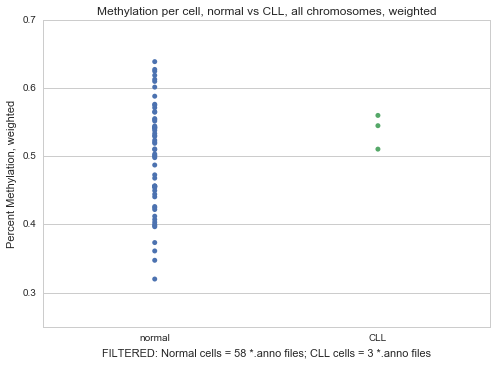

In [17]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined["type"], y=combined["methylation"])
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")

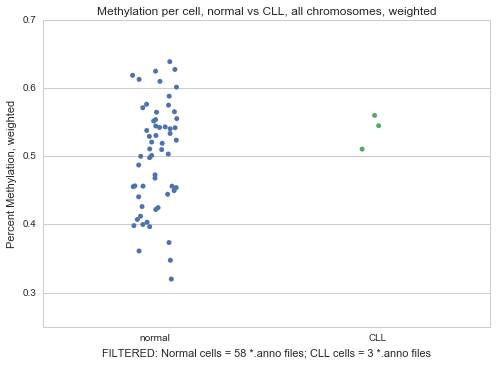

In [18]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined["type"], y=combined["methylation"], jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")


violin plot features a kernel density estimation of the underlying distribution


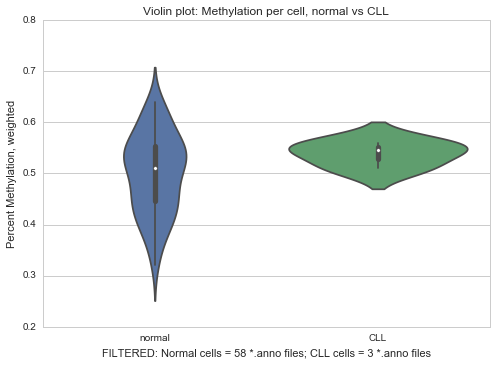

In [19]:
ax = sns.violinplot(x=combined["type"],  y=combined["methylation"])
sns.plt.title("Violin plot: Methylation per cell, normal vs CLL")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
print("violin plot features a kernel density estimation of the underlying distribution")

Box whisker plot


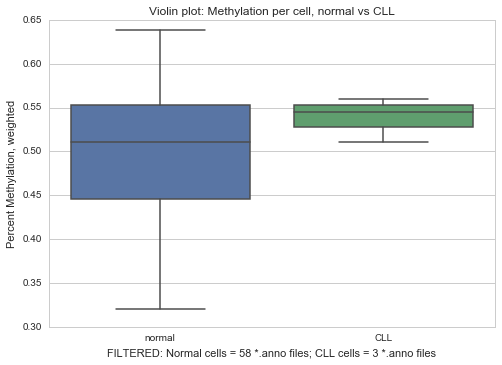

In [20]:
ax = sns.boxplot(x=combined["type"],y=combined["methylation"], linewidth=1.5)
sns.plt.title("Violin plot: Methylation per cell, normal vs CLL")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
print("Box whisker plot")



Box whisker plot


(0.35, 0.7)

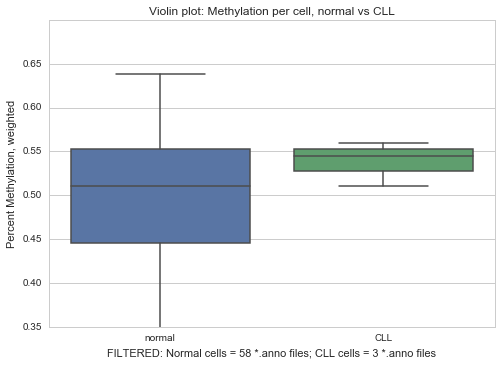

In [21]:
ax = sns.boxplot(x=combined["type"],y=combined["methylation"], linewidth=1.5)
sns.plt.title("Violin plot: Methylation per cell, normal vs CLL")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
print("Box whisker plot")
plt.ylim(0.35, 0.7)

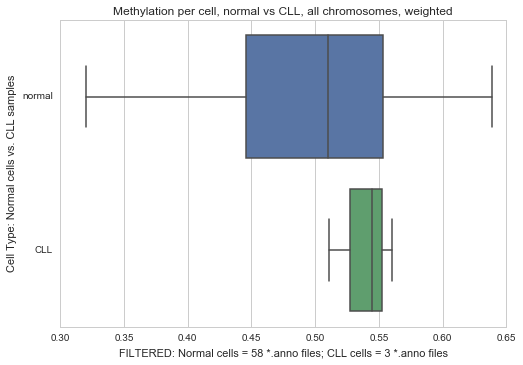

In [22]:
ax = sns.boxplot(y=combined["type"], x=combined["methylation"], linewidth=1.5)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Cell Type: Normal cells vs. CLL samples")

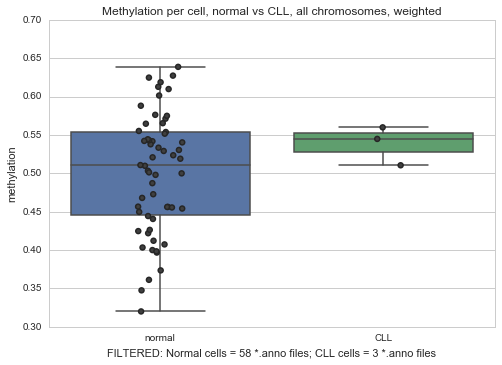

In [23]:
ax = sns.boxplot(x=combined["type"], y=combined["methylation"], linewidth=1.5)
ax = sns.stripplot(x=combined["type"], y=combined["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")


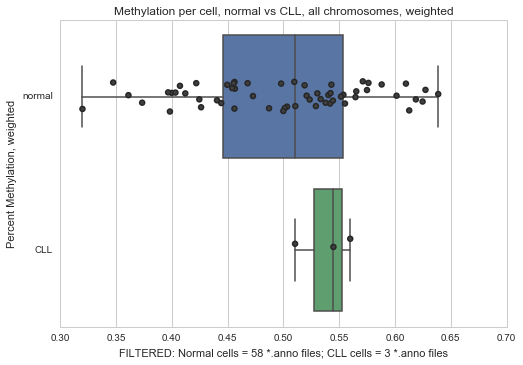

In [24]:
ax = sns.boxplot(y=combined["type"],  x=combined["methylation"], linewidth=1.5)
ax = sns.stripplot(y=combined["type"], x=combined["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")

Swarmplot == categorical scatterplot where the points do not overlap


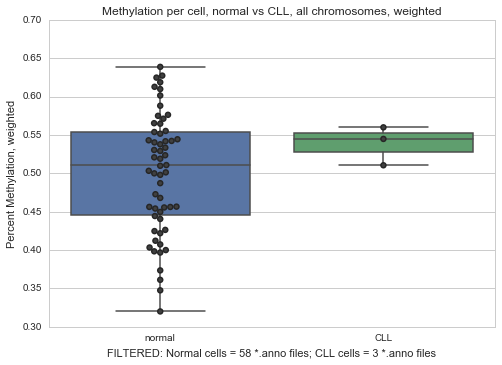

In [25]:
ax = sns.boxplot(x=combined["type"], y=combined["methylation"], linewidth=1.5)
ax = sns.swarmplot(x=combined["type"], y=combined["methylation"], color=".25", linewidth=1.5)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")

print("Swarmplot == categorical scatterplot where the points do not overlap")


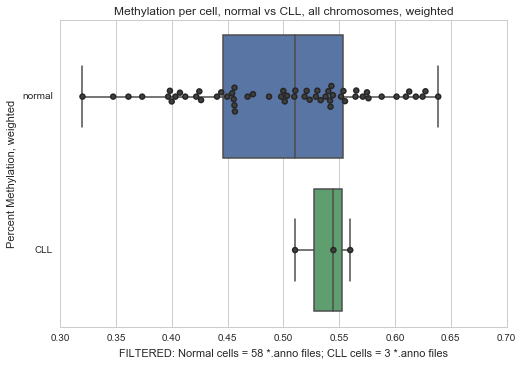

In [26]:
ax = sns.boxplot(y=combined["type"], x=combined["methylation"], linewidth=1.5)
ax = sns.swarmplot(y=combined["type"], x=combined["methylation"], color=".25", linewidth=1.5)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")


In [27]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_ALL.csv")    
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalmcell_ALL.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalpcell_ALL.csv")
normal_cellD_df = pd.read_csv("Meth_PDR_cell_Normal_NormalBCD19pcell_ALL.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_ALL.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_C_ALL.csv")

In [28]:
normal_cellA_df = normal_cellA_df.drop(["Unnamed: 0"], axis=1)  
normal_cellA_df["type"] = str('normal')
normal_cellA_df["bio"] = str('normal_B')
normal_cellA_df["protocol"] = normal_cellA_df["filename"].str[5:24]
normal_cellB_df["type"] = str('normal')
normal_cellB_df = normal_cellB_df.drop(["Unnamed: 0"], axis=1)
normal_cellB_df["type"] = str('normal')
normal_cellB_df["bio"] = str('CD19CD27m')
normal_cellB_df["protocol"] = normal_cellB_df["filename"].str[5:31]
normal_cellC_df = normal_cellC_df.drop(["Unnamed: 0"], axis=1)  
normal_cellC_df["type"] = str('normal')
normal_cellC_df["bio"] = str('CD19CD27p')
normal_cellC_df["protocol"] = normal_cellC_df["filename"].str[5:31]
normal_cellD_df = normal_cellD_df.drop(["Unnamed: 0"], axis=1)  
normal_cellD_df["type"] = str('normal')
normal_cellD_df["bio"] = str('CD19p')
normal_cellD_df["protocol"] = normal_cellD_df["filename"].str[:26]

In [29]:
frames4 = [normal_cellA_df, normal_cellB_df, normal_cellC_df, normal_cellD_df]
normal_result = pd.concat(frames4)

In [30]:
normal_result = normal_result[['filename', 'methylation', 'PDR_total', 'thisMeth', 'mixedReadCount', 'total_reads', 'type', 'bio', 'protocol']]

In [31]:
normal_result.shape

(392, 9)

In [32]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1) 
cll_cellA_df["type"] = str('CLL')
cll_cellA_df["bio"] = str('CLL')
cll_cellA_df["protocol"] = cll_cellA_df["filename"].str[5:34]
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_CutSmart_proteinase_K_T'] = 'cw154_CutSmart_proteinase_K'
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_Tris_protease_GR_CAGAGA'] = 'cw154_Tris_protease_GR'
cll_cellA_df["protocol"][(cll_cellA_df["protocol"] 
                          != 'cw154_Tris_protease_GR') & (cll_cellA_df["protocol"] != 'cw154_CutSmart_proteinase_K')] = 'cw154_Tris_protease'

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1) 
cll_cellC_df["type"] = str('CLL')
cll_cellC_df["bio"] = str('CLL')
cll_cellC_df["protocol"] = cll_cellC_df["filename"].str[5:17]


In [34]:
frames2 = [cll_cellA_df, cll_cellC_df]
cll_result = pd.concat(frames2)
cll_result.shape

(110, 9)

In [35]:
cll_result = cll_result[['filename', 'methylation', 'thisMeth', 'PDR_total', 'mixedReadCount', 'total_reads', 'type', 'bio', 'protocol']]

In [36]:
cll_result = cll_result.reset_index(drop=True)
normal_result = normal_result.reset_index(drop=True)
combined2 = normal_result.append(cll_result)
combined2 = combined2.reset_index(drop=True)

In [37]:
combined2.shape

(502, 9)

In [38]:
combined_no_filter = combined2

In [39]:
# Remove all data points with less than 100k in totcpg 
combined2 = combined2[combined2['total_reads'] < 100000]

In [40]:
combined2.shape

(61, 9)

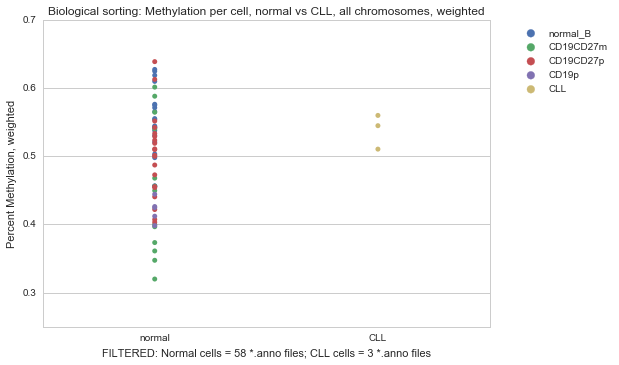

In [41]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Percent Methylation, weighted")

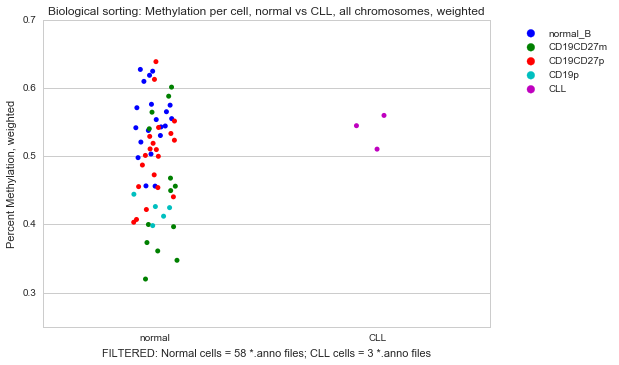

In [42]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, 
                   jitter=True, palette=dict(normal_B = 'b', CD19CD27m = 'g', CD19CD27p = 'r', CLL='m', CD19p = 'c'))
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)



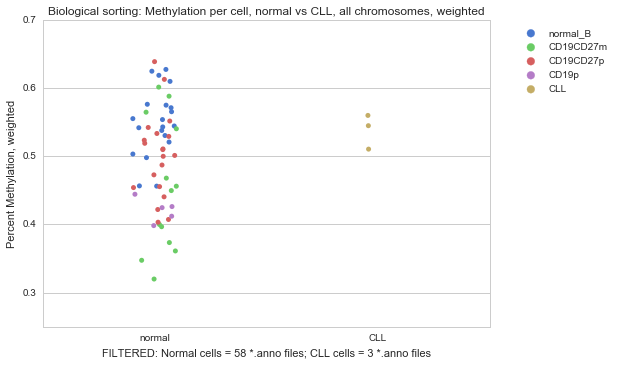

In [43]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Percent Methylation, weighted")

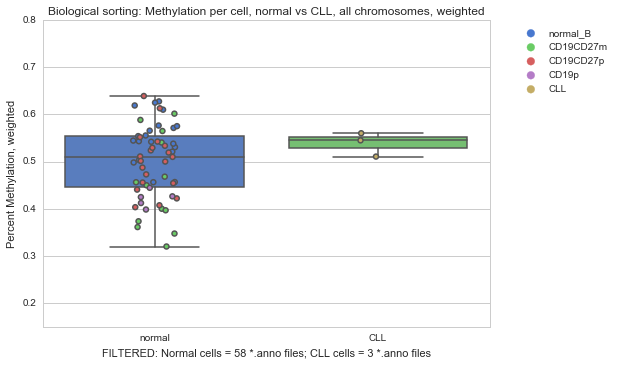

In [44]:
ax = sns.boxplot(x=combined2["type"],y=combined2["methylation"], linewidth=1.5)
plt.ylim(0.15,0.8)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


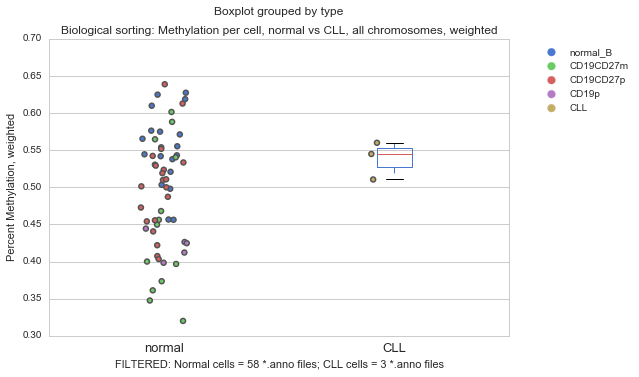

In [45]:
combined2.boxplot(column = 'methylation', by='type', fontsize=13)

sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


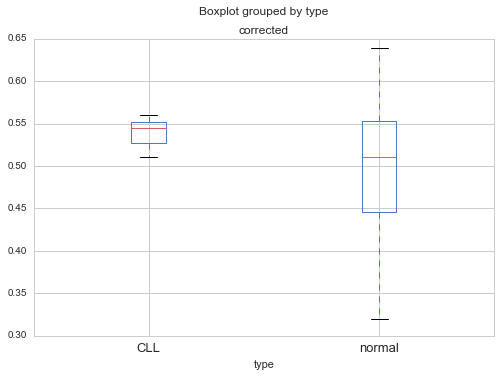

In [46]:
combined2.boxplot(column = 'methylation', by='type', fontsize=13)
plt.title('corrected')

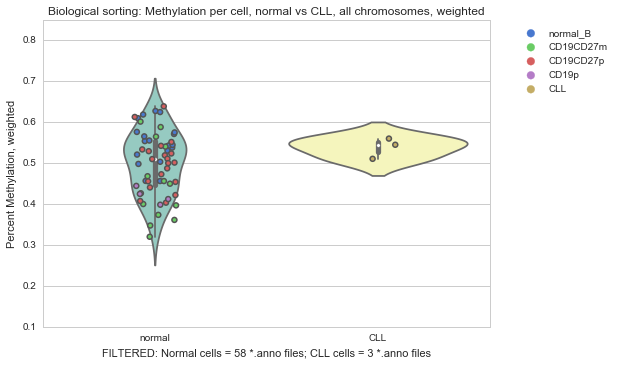

In [47]:
ax = sns.violinplot(x=combined2["type"],y=combined2["methylation"], palette="Set3")
plt.ylim(0.1,0.85)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

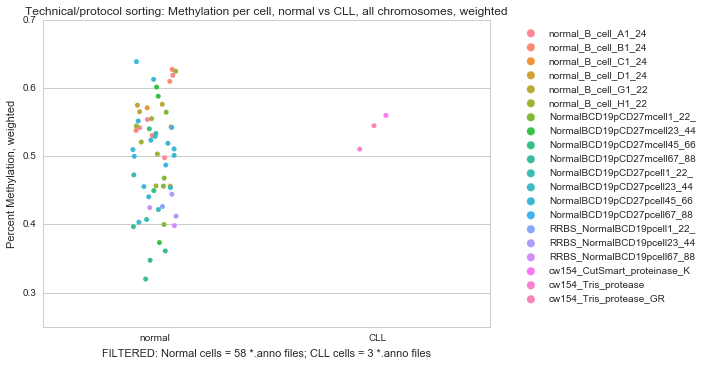

In [48]:
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.protocol, jitter=True)
sns.plt.title("Technical/protocol sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

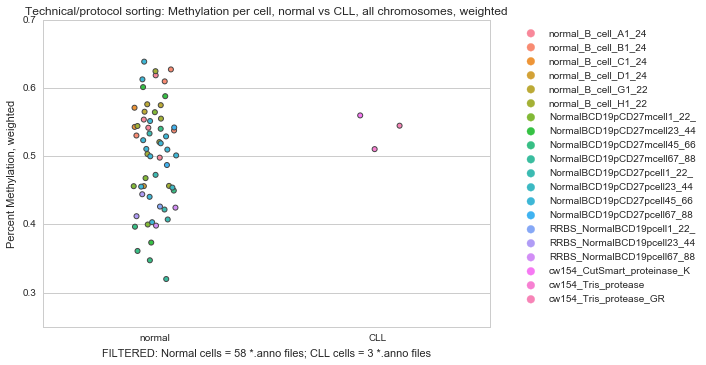

In [49]:
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"],y=combined2["methylation"], hue=combined2.protocol, jitter=True, linewidth=1.0)
sns.plt.title("Technical/protocol sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

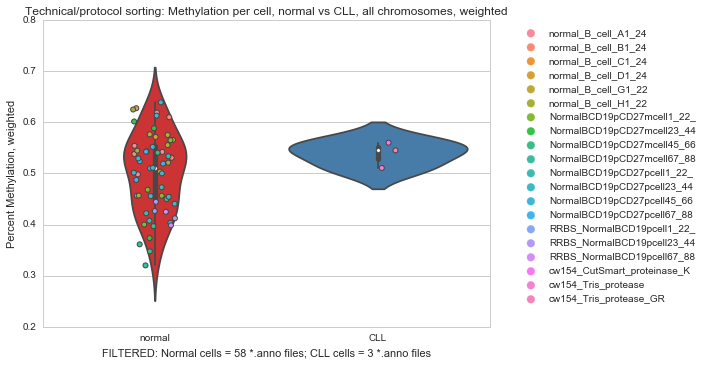

In [50]:
ax = sns.violinplot(x=combined2["type"], y=combined2["methylation"], palette="Set1")
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["methylation"], hue=combined2.protocol, jitter=True, linewidth=1.0)
sns.plt.title("Technical/protocol sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("Percent Methylation, weighted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

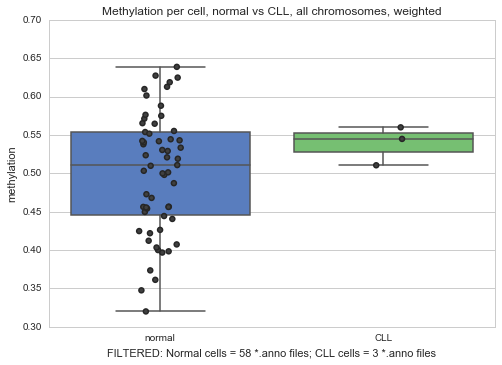

In [51]:
ax = sns.boxplot(x=combined["type"], y=combined["methylation"], linewidth=1.5)
ax = sns.stripplot(x=combined["type"], y=combined["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")

In [52]:
combined.groupby("type").mean()

,Unnamed: 0,methylation,PDR_total,thisMeth,mixedReadCount,total_reads
type,,,,,,
CLL,30.333333,0.538456,0.367487,8388.666667,5660.666667,15581.000000
normal,53.620690,0.499998,0.269000,5512.293103,3146.982759,10738.517241


In [53]:
combined.groupby("type").std()

,Unnamed: 0,methylation,PDR_total,thisMeth,mixedReadCount,total_reads
type,,,,,,
CLL,20.033306,0.025334,0.053659,1832.587333,1081.814371,3268.166458
normal,32.895810,0.077471,0.083526,7030.274525,4539.903231,14117.650785


In [54]:
from scipy.stats import ttest_ind

cat1 = combined[combined['type']=='CLL']
cat2 = combined[combined['type']=='normal']

cat1.head()
cat2.head()

,Unnamed: 0,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type
3,3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC.dan.a...,0.618746,0.384385,8694.0,5401.0,14051.0,normal
9,9,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG.dan.a...,0.553853,0.373654,2674.0,1804.0,4828.0,normal
14,14,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC.dan.a...,0.498034,0.279361,2027.0,1137.0,4070.0,normal
23,23,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC.dan.a...,0.541876,0.444256,7971.0,6535.0,14710.0,normal
26,26,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG.dan.a...,0.530481,0.332149,12844.0,8042.0,24212.0,normal


In [55]:
cat1.head()

,Unnamed: 0,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type
403,11,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CTAT...,0.559954,0.306098,10129.0,5537.0,18089.0,CLL
421,29,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG.dan.a...,0.510525,0.405451,8561.0,6799.0,16769.0,CLL
443,51,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG.da...,0.544889,0.390913,6476.0,4646.0,11885.0,CLL


In [56]:
cat2.head()

,Unnamed: 0,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type
3,3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC.dan.a...,0.618746,0.384385,8694.0,5401.0,14051.0,normal
9,9,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG.dan.a...,0.553853,0.373654,2674.0,1804.0,4828.0,normal
14,14,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC.dan.a...,0.498034,0.279361,2027.0,1137.0,4070.0,normal
23,23,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC.dan.a...,0.541876,0.444256,7971.0,6535.0,14710.0,normal
26,26,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG.dan.a...,0.530481,0.332149,12844.0,8042.0,24212.0,normal


In [57]:
t, p = ttest_ind(cat1.methylation, cat2.methylation)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# Data are rarely normally distributed when we compare algorithms (but this is often the case in biology). 
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#

t-statistic is 0.851387682829
p-value is 0.397996480565


In [58]:
import scipy.stats
z, p = scipy.stats.mannwhitneyu(cat1.methylation, cat2.methylation)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

Mann-Whitney U statistic is 58.0
p-value is 0.341843922826


In [59]:
cat3 = combined2[combined2['type']=='CLL']
cat4 = combined2[combined2['type']=='normal']


In [60]:
cat3.head()

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
403,0.306098,CLL,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CTAT...,0.559954,5537.0,cw154_CutSmart_proteinase_K,10129.0,18089.0,CLL
421,0.405451,CLL,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG.dan.a...,0.510525,6799.0,cw154_Tris_protease,8561.0,16769.0,CLL
443,0.390913,CLL,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG.da...,0.544889,4646.0,cw154_Tris_protease_GR,6476.0,11885.0,CLL


In [61]:
cat4.head()

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
3,0.384385,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC.dan.a...,0.618746,5401.0,normal_B_cell_A1_24,8694.0,14051.0,normal
9,0.373654,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG.dan.a...,0.553853,1804.0,normal_B_cell_A1_24,2674.0,4828.0,normal
14,0.279361,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC.dan.a...,0.498034,1137.0,normal_B_cell_A1_24,2027.0,4070.0,normal
23,0.444256,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC.dan.a...,0.541876,6535.0,normal_B_cell_A1_24,7971.0,14710.0,normal
26,0.332149,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG.dan.a...,0.530481,8042.0,normal_B_cell_B1_24,12844.0,24212.0,normal


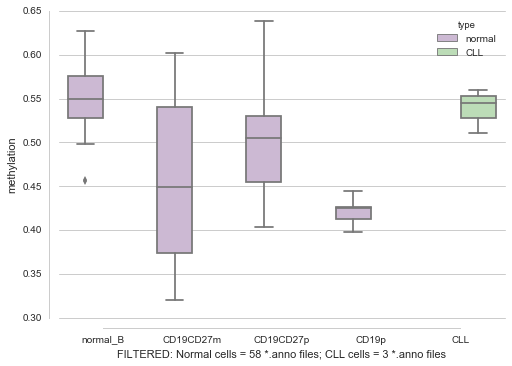

In [62]:

sns.boxplot(x="bio", y="methylation", hue="type", data=combined2, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")

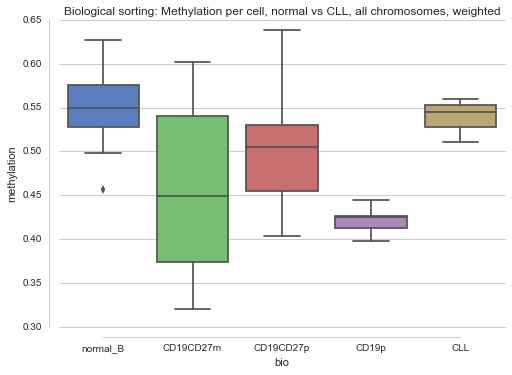

In [63]:
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
sns.boxplot(x="bio", y="methylation", data=combined2)
sns.despine(offset=10, trim=True)



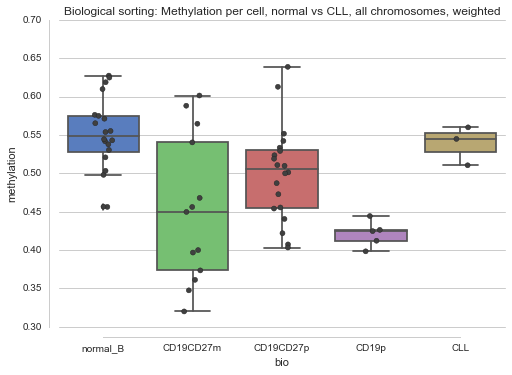

In [64]:
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
sns.boxplot(x="bio", y="methylation", data=combined2)
sns.stripplot(x="bio", y="methylation", data=combined2, color=".25", linewidth=0.5, jitter=True)
sns.despine(offset=10, trim=True)

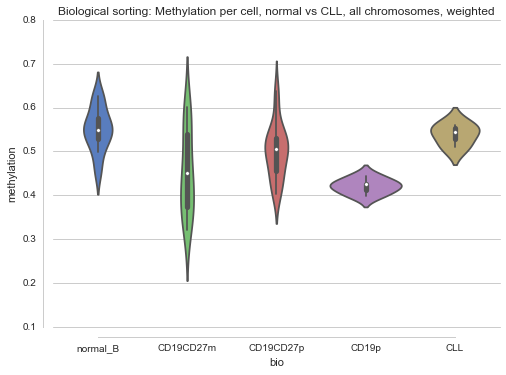

In [65]:
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
sns.violinplot(x="bio", y="methylation", data=combined2)
sns.despine(offset=10, trim=True)

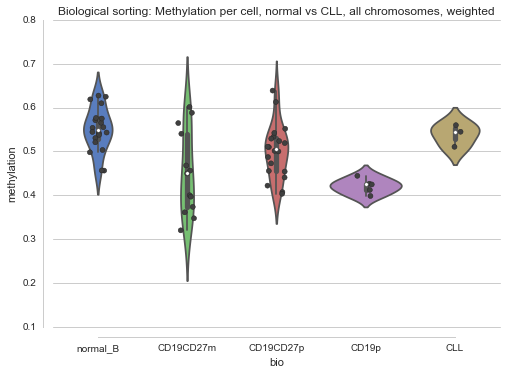

In [66]:

sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
sns.stripplot(x="bio", y="methylation", data=combined2, color=".25", linewidth=0.5, jitter=True)
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
sns.violinplot(x="bio", y="methylation", data=combined2)
sns.despine(offset=10, trim=True)

In [67]:
total_filenames = combined2.filename

In [68]:
type(total_filenames)

pandas.core.series.Series

In [69]:
# total_filenames.to_csv('total_singleCell_filenames_unfilted.csv')

In [70]:
# df = pd.read_csv('total_singleCell_filenames_unfilted.csv')

In [71]:
pcells = glob.glob("RRBS_NormalBCD19pcell*")

In [72]:
df = pd.read_table('RRBS_NormalBCD19pcell67_88_TCCTGAGC.CCTTCG.dan.anno')

In [73]:
stats = pd.read_csv('allStats.txt')

In [74]:
import csv


txt_file = r"allStats.txt"
csv_file = r"allStats.csv"

in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

In [75]:
df = pd.read_csv('allStats.csv')

In [76]:
df = df[['sample', 'totCpG']]

In [ ]:
RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG

In [77]:
# df.to_csv('total_CpG_filename.csv')

In [78]:
dd = pd.read_csv('total_CpG_filename.csv')

In [79]:
cll_result.head()

,filename,methylation,thisMeth,PDR_total,mixedReadCount,total_reads,type,bio,protocol
0,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAA...,0.579897,6397270.0,0.386702,4265991.0,11031739.0,CLL,CLL,cw154_CutSmart_proteinase_K
1,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACCG...,0.522693,1016616.0,0.409151,795781.0,1944958.0,CLL,CLL,cw154_CutSmart_proteinase_K
2,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACGT...,0.542438,3529800.0,0.404617,2632960.0,6507282.0,CLL,CLL,cw154_CutSmart_proteinase_K
3,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACTC...,0.593249,6515889.0,0.380884,4183400.0,10983399.0,CLL,CLL,cw154_CutSmart_proteinase_K
4,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AGGA...,0.580894,7433575.0,0.384684,4922710.0,12796773.0,CLL,CLL,cw154_CutSmart_proteinase_K


In [80]:
#cll_result['filename'] = cll_result['filename'].str.replace(r'.dan$', '')

In [81]:
dd = dd.drop("Unnamed: 0", axis=1)

In [82]:
dd = dd[dd['totCpG'] < 100000]

In [83]:
dd.shape

(0, 2)

In [84]:
ee = pd.read_csv('total_CpG_filename.csv')

In [85]:
ee.shape  # 522-453

(453, 3)

In [86]:
522-453

69

In [87]:
dd.head()

,filename,totCpG


In [88]:
dd = dd.rename(columns = {'sample':'filename'})

In [89]:
# dd.to_csv('total_CpG_filename.csv')

In [90]:
dd

,filename,totCpG


In [91]:
combined2['filename'] = combined2['filename'].str[:51]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
combined2['filename'] = combined2['filename'].str.replace(r'.annoRR', '')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [93]:
combined2['filename'] = combined2['filename'].str.replace(r'.dan', '')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
combined2['filename'] = combined2['filename'].str.replace(r'. ', '')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
combined2.filename[100:150]

Series([], Name: filename, dtype: object)

In [96]:
combined2.tail()

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
382,0.204607,CD19p,RRBS_NormalBCD19pcell67_88_TCCTGAGC.GACACG,0.398374,453.0,RRBS_NormalBCD19pcell67_88,882.0,2214.0,normal
391,0.196458,CD19p,RRBS_NormalBCD19pcell67_88_TCCTGAGC.TGCTGC,0.424735,2019.0,RRBS_NormalBCD19pcell67_88,4365.0,10277.0,normal
403,0.306098,CLL,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CTAT...,0.559954,5537.0,cw154_CutSmart_proteinase_K,10129.0,18089.0,CLL
421,0.405451,CLL,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG,0.510525,6799.0,cw154_Tris_protease,8561.0,16769.0,CLL
443,0.390913,CLL,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG.ann,0.544889,4646.0,cw154_Tris_protease_GR,6476.0,11885.0,CLL


In [97]:
len('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAACC.dan')

52

In [98]:
len('RRBS_trito_pool_2_CGTACTAG.TGACAG')

33

In [99]:
combined2['filename'][combined2["protocol"] == 'trito_pool_2'] = combined2['filename'].str[:33]


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [100]:
combined2.tail()

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
382,0.204607,CD19p,RRBS_NormalBCD19pcell67_88_TCCTGAGC.GACACG,0.398374,453.0,RRBS_NormalBCD19pcell67_88,882.0,2214.0,normal
391,0.196458,CD19p,RRBS_NormalBCD19pcell67_88_TCCTGAGC.TGCTGC,0.424735,2019.0,RRBS_NormalBCD19pcell67_88,4365.0,10277.0,normal
403,0.306098,CLL,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CTAT...,0.559954,5537.0,cw154_CutSmart_proteinase_K,10129.0,18089.0,CLL
421,0.405451,CLL,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG,0.510525,6799.0,cw154_Tris_protease,8561.0,16769.0,CLL
443,0.390913,CLL,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG.ann,0.544889,4646.0,cw154_Tris_protease_GR,6476.0,11885.0,CLL


In [101]:
combined2['filename'][combined2["protocol"] == 'trito_pool_1'] = combined2['filename'].str[:33]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [102]:
combined2['filename'][combined2["protocol"] == 'trito_pool_1'] = combined2['filename'].str[:33]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [103]:
combined2['filename'][combined2["protocol"] == 'NormalBCD19pCD27mcell1_22_'] = combined2['filename'].str[:46]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [104]:
combined2['filename'][combined2["protocol"] == 'NormalBCD19pCD27pcell1_22_'] = combined2['filename'].str[:46]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [105]:
combined2[250:300]

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type


In [106]:
len('RRBS_NormalBCD19pcell1_22_')

26

In [107]:
combined2['filename'][combined2["protocol"] == 'RRBS_NormalBCD19pcell1_22_'] = combined2['filename'].str[:41]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [108]:
combined2[330:350]

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type


In [109]:
len('RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAACC')

48

In [110]:
combined2['filename'][combined2["protocol"] == 'cw154_CutSmart_proteinase_K'] = combined2['filename'].str[:48]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [111]:
combined2[350:380]

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type


In [112]:
len('RRBS_cw154_Tris_protease_GR_CAGAGAGG.ACAACC')

43

In [113]:
combined2['filename'][combined2["protocol"] == 'cw154_Tris_protease_GR'] = combined2['filename'].str[:43]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [114]:
combined2[420:520]

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type


In [115]:
combined2.shape #441

(61, 9)

In [116]:
dd.shape

(0, 2)

In [117]:
common = dd.merge(combined2, on='filename')

In [118]:
common.shape

(0, 10)

In [119]:
dd[(~dd.filename.isin(common.filename))]

,filename,totCpG


In [120]:
combined2[270:350]

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type


In [121]:
combined_no_filter.shape

(502, 9)

In [122]:
combined2.shape

(61, 9)

In [123]:
combined2.head()

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
3,0.384385,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,5401.0,normal_B_cell_A1_24,8694.0,14051.0,normal
9,0.373654,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.553853,1804.0,normal_B_cell_A1_24,2674.0,4828.0,normal
14,0.279361,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.498034,1137.0,normal_B_cell_A1_24,2027.0,4070.0,normal
23,0.444256,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.541876,6535.0,normal_B_cell_A1_24,7971.0,14710.0,normal
26,0.332149,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.530481,8042.0,normal_B_cell_B1_24,12844.0,24212.0,normal


In [124]:
combined2[250:300]

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type


In [125]:
# Remove all data points with less than 100k in totcpg 
combined2 = combined2[combined2['total_reads'] < 100000]

In [126]:
combined_no_filter.shape

(502, 9)

In [127]:
totcpg = pd.read_csv('total_CpG_filename.csv')

In [128]:
totcpg.shape

(453, 3)

In [129]:
filtered_cpg = totcpg[totcpg['totCpG'] < 100000]

In [130]:
filtered_cpg.shape

(0, 3)

In [131]:
df = pd.read_csv('allStats.csv')

In [132]:
df.shape

(522, 25)

In [133]:
df33 = pd.read_table('RRBS_normal_B_cell_D1_24_TCCTGAGC.CTATTG.dan.anno')

In [134]:
df33['total_reads'] = df33[["methReadCount", "unmethReadCount", "mixedReadCount"]].sum(axis=1)


In [135]:
df33['total_reads'].sum()

33065547

In [136]:
combined2

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
3,0.384385,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,5401.0,normal_B_cell_A1_24,8694.0,14051.0,normal
9,0.373654,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.553853,1804.0,normal_B_cell_A1_24,2674.0,4828.0,normal
14,0.279361,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.498034,1137.0,normal_B_cell_A1_24,2027.0,4070.0,normal
23,0.444256,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.541876,6535.0,normal_B_cell_A1_24,7971.0,14710.0,normal
26,0.332149,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.530481,8042.0,normal_B_cell_B1_24,12844.0,24212.0,normal
28,0.248382,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,0.627377,4912.0,normal_B_cell_B1_24,12407.0,19776.0,normal
30,0.332140,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,0.609856,6585.0,normal_B_cell_B1_24,12091.0,19826.0,normal
39,0.301433,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,0.537865,3849.0,normal_B_cell_B1_24,6868.0,12769.0,normal
57,0.386633,normal_B,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,0.543082,5941.0,normal_B_cell_C1_24,8345.0,15366.0,normal
60,0.317183,normal_B,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,0.571221,4360.0,normal_B_cell_C1_24,7852.0,13746.0,normal


In [137]:
combined2 = combined2.reset_index(drop=True)

In [138]:
combined2 = combined2[combined2['total_reads'] < 100000]

In [139]:
combined2

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type
0,0.384385,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,5401.0,normal_B_cell_A1_24,8694.0,14051.0,normal
1,0.373654,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.553853,1804.0,normal_B_cell_A1_24,2674.0,4828.0,normal
2,0.279361,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.498034,1137.0,normal_B_cell_A1_24,2027.0,4070.0,normal
3,0.444256,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.541876,6535.0,normal_B_cell_A1_24,7971.0,14710.0,normal
4,0.332149,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.530481,8042.0,normal_B_cell_B1_24,12844.0,24212.0,normal
5,0.248382,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,0.627377,4912.0,normal_B_cell_B1_24,12407.0,19776.0,normal
6,0.332140,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,0.609856,6585.0,normal_B_cell_B1_24,12091.0,19826.0,normal
7,0.301433,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,0.537865,3849.0,normal_B_cell_B1_24,6868.0,12769.0,normal
8,0.386633,normal_B,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,0.543082,5941.0,normal_B_cell_C1_24,8345.0,15366.0,normal
9,0.317183,normal_B,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,0.571221,4360.0,normal_B_cell_C1_24,7852.0,13746.0,normal


In [140]:
stats = pd.read_csv('allStats.csv')

In [141]:
stats.head()  # sample, totCpG, bsRate

,sample,class,totMeth,totSeen,avSum,avTot,rMixed,rTot,rAv,rAvTot,sample.1,bed,methInfoFile,totReads,totAligned,totUsed,totClipped,totMethCpG,totSeenCpG,totCpG,sample.2,totalReadPairs,totalReads,alignedReads,bsRate
0,RRBS_trito_pool_1_TAAGGCGA.ACAACC,scCLL,16200247,26459744,589804.381329,979272,1707218,6898212,63327.391726,248437,RRBS_trito_pool_1_TAAGGCGA.ACAACC.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,8276357,7883322,7883322,120491,16374456,26716690,995714,RRBS_trito_pool_1_TAAGGCGA.ACAACC,8297596,16595192,11666213,0.980280
1,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,scCLL,9323253,15679703,411855.757258,694650,1008783,4076392,44693.975166,174308,RRBS_trito_pool_1_TAAGGCGA.ACGTGG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,4914353,4679956,4679956,68785,9443072,15850878,705787,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,4828405,9656810,6822031,0.980081
2,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,scCLL,13936061,22777935,511479.409928,851529,1417386,5739945,54134.747198,213209,RRBS_trito_pool_1_TAAGGCGA.ACTCAC.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,6794400,6500492,6500492,108121,14067287,22965785,865744,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,7084390,14168780,9869725,0.980305
3,RRBS_trito_pool_1_TAAGGCGA.AGGATG,scCLL,15308780,24985015,567608.363999,939422,1604313,6515345,59514.352762,235074,RRBS_trito_pool_1_TAAGGCGA.AGGATG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,7827601,7455882,7455882,112957,15482976,25239223,955160,RRBS_trito_pool_1_TAAGGCGA.AGGATG,11133907,22267814,11048117,0.980392
4,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,scCLL,9079622,15723841,365196.872199,624686,1012941,3996623,40262.819815,155636,RRBS_trito_pool_1_TAAGGCGA.ATAGCG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,4768014,4548257,4548257,69445,9169815,15859084,634455,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,4912633,9825266,6881418,0.980256


In [142]:
stats

,sample,class,totMeth,totSeen,avSum,avTot,rMixed,rTot,rAv,rAvTot,sample.1,bed,methInfoFile,totReads,totAligned,totUsed,totClipped,totMethCpG,totSeenCpG,totCpG,sample.2,totalReadPairs,totalReads,alignedReads,bsRate
0,RRBS_trito_pool_1_TAAGGCGA.ACAACC,scCLL,16200247,26459744,589804.381329,979272,1707218,6898212,63327.391726,248437,RRBS_trito_pool_1_TAAGGCGA.ACAACC.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,8276357,7883322,7883322,120491,16374456,26716690,995714,RRBS_trito_pool_1_TAAGGCGA.ACAACC,8297596,16595192,11666213,0.980280
1,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,scCLL,9323253,15679703,411855.757258,694650,1008783,4076392,44693.975166,174308,RRBS_trito_pool_1_TAAGGCGA.ACGTGG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,4914353,4679956,4679956,68785,9443072,15850878,705787,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,4828405,9656810,6822031,0.980081
2,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,scCLL,13936061,22777935,511479.409928,851529,1417386,5739945,54134.747198,213209,RRBS_trito_pool_1_TAAGGCGA.ACTCAC.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,6794400,6500492,6500492,108121,14067287,22965785,865744,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,7084390,14168780,9869725,0.980305
3,RRBS_trito_pool_1_TAAGGCGA.AGGATG,scCLL,15308780,24985015,567608.363999,939422,1604313,6515345,59514.352762,235074,RRBS_trito_pool_1_TAAGGCGA.AGGATG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,7827601,7455882,7455882,112957,15482976,25239223,955160,RRBS_trito_pool_1_TAAGGCGA.AGGATG,11133907,22267814,11048117,0.980392
4,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,scCLL,9079622,15723841,365196.872199,624686,1012941,3996623,40262.819815,155636,RRBS_trito_pool_1_TAAGGCGA.ATAGCG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,4768014,4548257,4548257,69445,9169815,15859084,634455,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,4912633,9825266,6881418,0.980256
5,RRBS_trito_pool_1_TAAGGCGA.ATCGAC,scCLL,15847022,25997715,599751.263165,1003200,1684349,6772872,64626.440789,252186,RRBS_trito_pool_1_TAAGGCGA.ATCGAC.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,8158753,7764444,7764444,114461,16021729,26256353,1018988,RRBS_trito_pool_1_TAAGGCGA.ATCGAC,8173382,16346764,11457529,0.980243
6,RRBS_trito_pool_1_TAAGGCGA.CAAGAG,scCLL,15329475,25106417,589176.938468,980207,1647679,6547830,63486.116722,245010,RRBS_trito_pool_1_TAAGGCGA.CAAGAG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,7845658,7489400,7489400,107829,15499654,25353914,995418,RRBS_trito_pool_1_TAAGGCGA.CAAGAG,7830666,15661332,11021573,0.980176
7,RRBS_trito_pool_1_TAAGGCGA.CATGAC,scCLL,15680693,25620524,609960.581944,1011273,1633936,6646507,63972.553558,252833,RRBS_trito_pool_1_TAAGGCGA.CATGAC.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,7979584,7614605,7614605,111644,15859667,25878556,1027388,RRBS_trito_pool_1_TAAGGCGA.CATGAC,7772244,15544488,11211583,0.980220
8,RRBS_trito_pool_1_TAAGGCGA.CCTTCG,scCLL,8999199,15282145,395532.340235,671602,989089,3927951,43425.905707,168131,RRBS_trito_pool_1_TAAGGCGA.CCTTCG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,4708074,4494344,4494344,66716,9096440,15424853,681439,RRBS_trito_pool_1_TAAGGCGA.CCTTCG,4694031,9388062,6636982,0.980113
9,RRBS_trito_pool_1_TAAGGCGA.CGGTAG,scCLL,10894615,18482233,456098.770824,771884,1227001,4822840,50086.969250,192250,RRBS_trito_pool_1_TAAGGCGA.CGGTAG.info,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,/seq/meissner/EPP/miseq/20150504_scRRBS_lysis/...,5803388,5536400,5536400,82348,11024548,18674094,783696,RRBS_trito_pool_1_TAAGGCGA.CGGTAG,5973183,11946366,8043844

In [143]:
stats = stats.drop('sample.1', axis=1)
stats = stats.drop('sample.2', axis=1)
stats = stats.reset_index(drop=True)
stats = stats.drop('class', axis=1)
stats = stats.drop('totMeth', axis=1)
stats = stats.drop('totSeen', axis=1)
stats = stats.drop('avSum', axis=1)
stats = stats.drop('avTot', axis=1)
stats = stats.drop('rMixed', axis=1)
stats = stats.drop('rTot', axis=1)
stats = stats.drop('rAv', axis=1)
stats = stats.drop('rAvTot', axis=1)
stats = stats.drop('bed', axis=1)
stats = stats.drop('methInfoFile', axis=1)
stats = stats.drop('totReads', axis=1)
stats = stats.drop('totAligned', axis=1)
stats = stats.drop('totClipped', axis=1)

stats = stats.drop('totUsed', axis=1)
stats = stats.drop('totMethCpG', axis=1)
# bs = bs.drop('totCpG', axis=1)
stats = stats.drop('totalReadPairs', axis=1)
stats = stats.drop('alignedReads', axis=1)
stats = stats.rename(columns = {'sample':'filename'})


In [144]:
stats

,filename,totSeenCpG,totCpG,totalReads,bsRate
0,RRBS_trito_pool_1_TAAGGCGA.ACAACC,26716690,995714,16595192,0.980280
1,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,15850878,705787,9656810,0.980081
2,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,22965785,865744,14168780,0.980305
3,RRBS_trito_pool_1_TAAGGCGA.AGGATG,25239223,955160,22267814,0.980392
4,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,15859084,634455,9825266,0.980256
5,RRBS_trito_pool_1_TAAGGCGA.ATCGAC,26256353,1018988,16346764,0.980243
6,RRBS_trito_pool_1_TAAGGCGA.CAAGAG,25353914,995418,15661332,0.980176
7,RRBS_trito_pool_1_TAAGGCGA.CATGAC,25878556,1027388,15544488,0.980220
8,RRBS_trito_pool_1_TAAGGCGA.CCTTCG,15424853,681439,9388062,0.980113
9,RRBS_trito_pool_1_TAAGGCGA.CGGTAG,18674094,783696,11946366,0.980278


In [145]:
new = combined2.merge(stats, on='filename')

In [146]:
new.tail()

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type,totSeenCpG,totCpG,totalReads,bsRate
55,0.204607,CD19p,RRBS_NormalBCD19pcell67_88_TCCTGAGC.GACACG,0.398374,453.0,RRBS_NormalBCD19pcell67_88,882.0,2214.0,normal,1915,1594,5322,0.996716
56,0.196458,CD19p,RRBS_NormalBCD19pcell67_88_TCCTGAGC.TGCTGC,0.424735,2019.0,RRBS_NormalBCD19pcell67_88,4365.0,10277.0,normal,11261,11203,7604,0.997005
57,0.306098,CLL,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CTATTG,0.559954,5537.0,cw154_CutSmart_proteinase_K,10129.0,18089.0,CLL,14925,7101,1779332,0.960779
58,0.405451,CLL,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG,0.510525,6799.0,cw154_Tris_protease,8561.0,16769.0,CLL,14598,11819,1311960,0.962711
59,0.390913,CLL,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG,0.544889,4646.0,cw154_Tris_protease_GR,6476.0,11885.0,CLL,10728,9539,1222002,0.962720


In [147]:
stats[(~stats.filename.isin(combined2.filename))]

,filename,totSeenCpG,totCpG,totalReads,bsRate
0,RRBS_trito_pool_1_TAAGGCGA.ACAACC,26716690,995714,16595192,0.980280
1,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,15850878,705787,9656810,0.980081
2,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,22965785,865744,14168780,0.980305
3,RRBS_trito_pool_1_TAAGGCGA.AGGATG,25239223,955160,22267814,0.980392
4,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,15859084,634455,9825266,0.980256
5,RRBS_trito_pool_1_TAAGGCGA.ATCGAC,26256353,1018988,16346764,0.980243
6,RRBS_trito_pool_1_TAAGGCGA.CAAGAG,25353914,995418,15661332,0.980176
7,RRBS_trito_pool_1_TAAGGCGA.CATGAC,25878556,1027388,15544488,0.980220
8,RRBS_trito_pool_1_TAAGGCGA.CCTTCG,15424853,681439,9388062,0.980113
9,RRBS_trito_pool_1_TAAGGCGA.CGGTAG,18674094,783696,11946366,0.980278


In [148]:
missing_stats = combined2[(~combined2.filename.isin(stats.filename))]

In [149]:
# missing_stats.to_csv("missing_stats.csv")

In [150]:
missing_stats2 = missing_stats

In [151]:
missing_stats2['bsRate'] = float(0.997499971)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [152]:
# from allStats.csv missing_stats2['bsRate'] = 0.9971
np.mean([0.99741282, 0.997556354, 0.997532899, 0.997475714, 0.997465996, 0.997555209, 0.997491836, 0.997508944])

0.99749997150000003

In [153]:
missing_stats2

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type,bsRate
32,0.202769,CD19CD27m,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.GCTGCC,0.320033,249.0,NormalBCD19pCD27mcell67_88,393.0,1228.0,normal,0.9975


In [154]:
new

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type,totSeenCpG,totCpG,totalReads,bsRate
0,0.384385,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,5401.0,normal_B_cell_A1_24,8694.0,14051.0,normal,15053,6950,732888,0.958175
1,0.373654,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.553853,1804.0,normal_B_cell_A1_24,2674.0,4828.0,normal,3734,3567,130686,0.960501
2,0.279361,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.498034,1137.0,normal_B_cell_A1_24,2027.0,4070.0,normal,4493,1823,156592,0.955798
3,0.444256,normal_B,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.541876,6535.0,normal_B_cell_A1_24,7971.0,14710.0,normal,8230,6931,88642,0.931093
4,0.332149,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.530481,8042.0,normal_B_cell_B1_24,12844.0,24212.0,normal,21237,17017,290136,0.943622
5,0.248382,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,0.627377,4912.0,normal_B_cell_B1_24,12407.0,19776.0,normal,17430,13240,375902,0.959328
6,0.332140,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,0.609856,6585.0,normal_B_cell_B1_24,12091.0,19826.0,normal,18263,13086,158132,0.961218
7,0.301433,normal_B,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,0.537865,3849.0,normal_B_cell_B1_24,6868.0,12769.0,normal,9614,8256,50840,0.958399
8,0.386633,normal_B,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,0.543082,5941.0,normal_B_cell_C1_24,8345.0,15366.0,normal,13353,12792,63996,0.959522
9,0.317183,normal_B,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,0.571221,4360.0,normal_B_cell_C1_24,7852.0,13746.0,normal,11756,9091,109438,0.960887


In [155]:
missing_stats2['totCpG'] = 'NaN'

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [156]:
missing_stats2

,PDR_total,bio,filename,methylation,mixedReadCount,protocol,thisMeth,total_reads,type,bsRate,totCpG
32,0.202769,CD19CD27m,RRBS_NormalBCD19pCD27mcell67_88_CGTACTAG.GCTGCC,0.320033,249.0,NormalBCD19pCD27mcell67_88,393.0,1228.0,normal,0.9975,NaN


In [157]:
concat_new = pd.concat([new, missing_stats2])

In [158]:
concat_new

,PDR_total,bio,bsRate,filename,methylation,mixedReadCount,protocol,thisMeth,totCpG,totSeenCpG,totalReads,total_reads,type
0,0.384385,normal_B,0.958175,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,5401.0,normal_B_cell_A1_24,8694.0,6950,15053.0,732888.0,14051.0,normal
1,0.373654,normal_B,0.960501,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.553853,1804.0,normal_B_cell_A1_24,2674.0,3567,3734.0,130686.0,4828.0,normal
2,0.279361,normal_B,0.955798,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.498034,1137.0,normal_B_cell_A1_24,2027.0,1823,4493.0,156592.0,4070.0,normal
3,0.444256,normal_B,0.931093,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.541876,6535.0,normal_B_cell_A1_24,7971.0,6931,8230.0,88642.0,14710.0,normal
4,0.332149,normal_B,0.943622,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.530481,8042.0,normal_B_cell_B1_24,12844.0,17017,21237.0,290136.0,24212.0,normal
5,0.248382,normal_B,0.959328,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,0.627377,4912.0,normal_B_cell_B1_24,12407.0,13240,17430.0,375902.0,19776.0,normal
6,0.332140,normal_B,0.961218,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,0.609856,6585.0,normal_B_cell_B1_24,12091.0,13086,18263.0,158132.0,19826.0,normal
7,0.301433,normal_B,0.958399,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,0.537865,3849.0,normal_B_cell_B1_24,6868.0,8256,9614.0,50840.0,12769.0,normal
8,0.386633,normal_B,0.959522,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,0.543082,5941.0,normal_B_cell_C1_24,8345.0,12792,13353.0,63996.0,15366.0,normal
9,0.317183,normal_B,0.960887,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,0.571221,4360.0,normal_B_cell_C1_24,7852.0,9091,11756.0,109438.0,13746.0,normal


In [159]:
concat_new = concat_new.reset_index(drop=True)

In [160]:
concat_new

,PDR_total,bio,bsRate,filename,methylation,mixedReadCount,protocol,thisMeth,totCpG,totSeenCpG,totalReads,total_reads,type
0,0.384385,normal_B,0.958175,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.618746,5401.0,normal_B_cell_A1_24,8694.0,6950,15053.0,732888.0,14051.0,normal
1,0.373654,normal_B,0.960501,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.553853,1804.0,normal_B_cell_A1_24,2674.0,3567,3734.0,130686.0,4828.0,normal
2,0.279361,normal_B,0.955798,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.498034,1137.0,normal_B_cell_A1_24,2027.0,1823,4493.0,156592.0,4070.0,normal
3,0.444256,normal_B,0.931093,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.541876,6535.0,normal_B_cell_A1_24,7971.0,6931,8230.0,88642.0,14710.0,normal
4,0.332149,normal_B,0.943622,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.530481,8042.0,normal_B_cell_B1_24,12844.0,17017,21237.0,290136.0,24212.0,normal
5,0.248382,normal_B,0.959328,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,0.627377,4912.0,normal_B_cell_B1_24,12407.0,13240,17430.0,375902.0,19776.0,normal
6,0.332140,normal_B,0.961218,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,0.609856,6585.0,normal_B_cell_B1_24,12091.0,13086,18263.0,158132.0,19826.0,normal
7,0.301433,normal_B,0.958399,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,0.537865,3849.0,normal_B_cell_B1_24,6868.0,8256,9614.0,50840.0,12769.0,normal
8,0.386633,normal_B,0.959522,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,0.543082,5941.0,normal_B_cell_C1_24,8345.0,12792,13353.0,63996.0,15366.0,normal
9,0.317183,normal_B,0.960887,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,0.571221,4360.0,normal_B_cell_C1_24,7852.0,9091,11756.0,109438.0,13746.0,normal


In [161]:
concat_new = concat_new[['filename', 'protocol', 'type', 'bio', 'total_reads', 'totCpG', 'bsRate', 'methylation', 'PDR_total']]

In [162]:
concat_new.columns

Index(['filename', 'protocol', 'type', 'bio', 'total_reads', 'totCpG',
       'bsRate', 'methylation', 'PDR_total'],
      dtype='object')

In [163]:
concat_new

,filename,protocol,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149
5,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,normal_B_cell_B1_24,normal,normal_B,19776.0,13240,0.959328,0.627377,0.248382
6,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,normal_B_cell_B1_24,normal,normal_B,19826.0,13086,0.961218,0.609856,0.332140
7,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,normal_B_cell_B1_24,normal,normal_B,12769.0,8256,0.958399,0.537865,0.301433
8,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,normal_B_cell_C1_24,normal,normal_B,15366.0,12792,0.959522,0.543082,0.386633
9,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,normal_B_cell_C1_24,normal,normal_B,13746.0,9091,0.960887,0.571221,0.317183


In [164]:
mcells = glob.glob("stacked_RRBS_NormalBCD19pCD27mcell*")
newdf1 = pd.DataFrame()
for filename in mcells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:56]
    df["protocol"] = df["filename"].str[:31]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [165]:
newdf1.shape

(88, 3)

In [166]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [167]:
newdf1.shape

(88, 3)

In [168]:
mcells = glob.glob("stacked_RRBS_NormalBCD19pCD27mcell*")
newdf2 = pd.DataFrame()
for filename in mcells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:56]
    df["protocol"] = df["filename"].str[:31]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [169]:
newdf2.shape

(88, 3)

In [170]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [171]:
mcell_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [172]:
mcell_cpg = mcell_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [173]:
mcell_cpg["filename"][mcell_cpg["protocol"] == 'RRBS_NormalBCD19pCD27mcell1_22_'] = mcell_cpg["filename"].str[:46]

In [174]:
mcell_cpg

,filename,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,protocol
0,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACAACC,5.339387,7.175373,RRBS_NormalBCD19pCD27mcell1_22_
1,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACCGCG,5.477209,7.136911,RRBS_NormalBCD19pCD27mcell1_22_
2,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACGTGG,5.484594,7.156494,RRBS_NormalBCD19pCD27mcell1_22_
3,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACTCAC,5.296074,6.935533,RRBS_NormalBCD19pCD27mcell1_22_
4,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.AGGATG,5.232697,6.855513,RRBS_NormalBCD19pCD27mcell1_22_
5,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ATAGCG,5.442401,7.105791,RRBS_NormalBCD19pCD27mcell1_22_
6,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ATCGAC,5.313003,6.953725,RRBS_NormalBCD19pCD27mcell1_22_
7,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.CAAGAG,5.308502,6.971105,RRBS_NormalBCD19pCD27mcell1_22_
8,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.CATGAC,5.312510,6.973089,RRBS_NormalBCD19pCD27mcell1_22_
9,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.CCTTCG,5.348578,6.990864,RRBS_NormalBCD19pCD27mcell1_22_


In [175]:
# mcell_cpg.to_csv("CD27mcell_AvgCpG_read.csv")

In [176]:
len('RRBS_NormalBCD19pcell')

21

In [177]:
pcells = glob.glob("stacked_RRBS_NormalBCD19pCD27pcell*")
newdf1 = pd.DataFrame()
for filename in pcells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:56]
    df["protocol"] = df["filename"].str[:31]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [178]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [179]:
newdf1.shape

(91, 3)

In [180]:
pcells = glob.glob("stacked_RRBS_NormalBCD19pCD27pcell*")
newdf2 = pd.DataFrame()
for filename in pcells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:56]
    df["protocol"] = df["filename"].str[:31]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [181]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [182]:
newdf2.shape

(91, 3)

In [183]:
pcell_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [184]:
pcell_cpg

,filename,avgReadCpGs_lesseql3.8filter,protocol,avgReadCpGs_lessthan1filter
0,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC.,6.848623,RRBS_NormalBCD19pCD27pcell1_22_,5.201094
1,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG.,6.960099,RRBS_NormalBCD19pCD27pcell1_22_,5.317486
2,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACGTGG.,6.732510,RRBS_NormalBCD19pCD27pcell1_22_,5.093671
3,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACTCAC.,6.933786,RRBS_NormalBCD19pCD27pcell1_22_,5.299826
4,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.AGGATG.,7.097282,RRBS_NormalBCD19pCD27pcell1_22_,5.421415
5,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ATAGCG.,6.846798,RRBS_NormalBCD19pCD27pcell1_22_,5.222756
6,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ATCGAC.,6.854665,RRBS_NormalBCD19pCD27pcell1_22_,5.226612
7,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.CAAGAG.,6.867533,RRBS_NormalBCD19pCD27pcell1_22_,5.229249
8,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.CATGAC.,6.867662,RRBS_NormalBCD19pCD27pcell1_22_,5.246413
9,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.CCTTCG.,6.854722,RRBS_NormalBCD19pCD27pcell1_22_,5.206774


In [185]:
pcell_cpg = pcell_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [186]:
pcell_cpg["filename"][pcell_cpg["protocol"] == 'RRBS_NormalBCD19pCD27pcell1_22_'] = pcell_cpg["filename"].str[:46]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2869: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.or

In [187]:
pcell_cpg

,filename,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,protocol
0,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC,5.201094,6.848623,RRBS_NormalBCD19pCD27pcell1_22_
1,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG,5.317486,6.960099,RRBS_NormalBCD19pCD27pcell1_22_
2,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACGTGG,5.093671,6.732510,RRBS_NormalBCD19pCD27pcell1_22_
3,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACTCAC,5.299826,6.933786,RRBS_NormalBCD19pCD27pcell1_22_
4,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.AGGATG,5.421415,7.097282,RRBS_NormalBCD19pCD27pcell1_22_
5,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ATAGCG,5.222756,6.846798,RRBS_NormalBCD19pCD27pcell1_22_
6,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ATCGAC,5.226612,6.854665,RRBS_NormalBCD19pCD27pcell1_22_
7,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.CAAGAG,5.229249,6.867533,RRBS_NormalBCD19pCD27pcell1_22_
8,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.CATGAC,5.246413,6.867662,RRBS_NormalBCD19pCD27pcell1_22_
9,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.CCTTCG,5.206774,6.854722,RRBS_NormalBCD19pCD27pcell1_22_


In [188]:
# pcell_cpg.to_csv("CD27pcell_AvgCpG_read.csv")

In [189]:
cells = glob.glob("stacked_RRBS_NormalBCD19pcell*")
newdf1 = pd.DataFrame()
for filename in cells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:51]
    df["protocol"] = df["filename"].str[:26]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [190]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [191]:
newdf1.shape

(89, 3)

In [192]:
cells = glob.glob("stacked_RRBS_NormalBCD19pcell*")
newdf2 = pd.DataFrame()
for filename in cells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:51]
    df["protocol"] = df["filename"].str[:26]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [193]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [194]:
newdf2.shape

(89, 3)

In [195]:
CD19pcell_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [196]:
CD19pcell_cpg.shape

(89, 4)

In [197]:
len('RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACAACC')

41

In [198]:
CD19pcell_cpg

,filename,avgReadCpGs_lesseql3.8filter,protocol,avgReadCpGs_lessthan1filter
0,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACAACC.,6.935702,RRBS_NormalBCD19pcell1_22_,5.301721
1,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACCGCG.,7.106834,RRBS_NormalBCD19pcell1_22_,5.481722
2,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACGTGG.,7.106527,RRBS_NormalBCD19pcell1_22_,5.440442
3,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACTCAC.,6.825582,RRBS_NormalBCD19pcell1_22_,5.180314
4,RRBS_NormalBCD19pcell1_22_TAAGGCGA.AGGATG.,6.780089,RRBS_NormalBCD19pcell1_22_,5.148730
5,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ATAGCG.,7.047127,RRBS_NormalBCD19pcell1_22_,5.393199
6,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ATCGAC.,6.943888,RRBS_NormalBCD19pcell1_22_,5.307057
7,RRBS_NormalBCD19pcell1_22_TAAGGCGA.CAAGAG.,6.827440,RRBS_NormalBCD19pcell1_22_,5.173061
8,RRBS_NormalBCD19pcell1_22_TAAGGCGA.CATGAC.,6.893372,RRBS_NormalBCD19pcell1_22_,5.254944
9,RRBS_NormalBCD19pcell1_22_TAAGGCGA.CCTTCG.,6.796568,RRBS_NormalBCD19pcell1_22_,5.169136


In [199]:
CD19pcell_cpg["filename"][CD19pcell_cpg["protocol"] == 'RRBS_NormalBCD19pcell1_22_'] = CD19pcell_cpg["filename"].str[:41]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [200]:
CD19pcell_cpg = CD19pcell_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [201]:
CD19pcell_cpg = CD19pcell_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [202]:
# CD19pcell_cpg.to_csv("NormalBCD19pcell_AvgCpG_read.csv")

In [203]:
normal_B = glob.glob("stacked_RRBS_normal_B_cell*")

In [204]:
len('stacked_RRBS_normal_B_cell_A1_24_')

33

In [205]:
normal_B = glob.glob("stacked_RRBS_normal_B_cell*")
newdf1 = pd.DataFrame()
for filename in normal_B:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:49]
    df["protocol"] = df["filename"].str[:24]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [206]:
newdf1.shape

(138, 3)

In [207]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [208]:
normal_B = glob.glob("stacked_RRBS_normal_B_cell*")
newdf2 = pd.DataFrame()
for filename in normal_B:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:49]
    df["protocol"] = df["filename"].str[:24]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [209]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [210]:
normalB_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [211]:
newdf2.shape

(138, 3)

In [212]:
newdf1.shape

(138, 3)

In [213]:
len('RRBS_normal_B_cell_A1_24_')

25

In [214]:
normalB_cpg = normalB_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [215]:
# normalB_cpg.to_csv("Normal_B_cell_AvgCpG_read.csv")

In [216]:
trito = glob.glob("stacked_RRBS_trito_pool*")
newdf1 = pd.DataFrame()
for filename in trito:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:42]
    df["protocol"] = df["filename"].str[:17]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [217]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [218]:
newdf1.shape

(44, 3)

In [219]:
trito = glob.glob("stacked_RRBS_trito_pool*")
newdf2 = pd.DataFrame()
for filename in trito:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:42]
    df["protocol"] = df["filename"].str[:17]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [220]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [221]:
newdf2.shape

(44, 3)

In [222]:
trito_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [223]:
trito_cpg = trito_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [224]:
trito_cpg

,filename,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,protocol
0,RRBS_trito_pool_1_TAAGGCGA.ACAACC,5.363758,7.022425,RRBS_trito_pool_1
1,RRBS_trito_pool_1_TAAGGCGA.ACGTGG,5.356706,7.037096,RRBS_trito_pool_1
2,RRBS_trito_pool_1_TAAGGCGA.ACTCAC,5.383470,7.012386,RRBS_trito_pool_1
3,RRBS_trito_pool_1_TAAGGCGA.ATAGCG,5.386900,7.055775,RRBS_trito_pool_1
4,RRBS_trito_pool_1_TAAGGCGA.ATCGAC,5.382781,7.033809,RRBS_trito_pool_1
5,RRBS_trito_pool_1_TAAGGCGA.CAAGAG,5.395755,7.028477,RRBS_trito_pool_1
6,RRBS_trito_pool_1_TAAGGCGA.CATGAC,5.422047,7.064270,RRBS_trito_pool_1
7,RRBS_trito_pool_1_TAAGGCGA.CCTTCG,5.279147,6.920984,RRBS_trito_pool_1
8,RRBS_trito_pool_1_TAAGGCGA.CGGTAG,5.348528,7.020675,RRBS_trito_pool_1
9,RRBS_trito_pool_1_TAAGGCGA.CTATTG,5.390609,7.017458,RRBS_trito_pool_1


In [225]:
# trito_cpg.to_csv('trito_pool_AvgCpG_read.csv')

In [226]:
# RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.TCTCTG.dan.anno

In [227]:
cw154_cutmart = glob.glob("stacked_RRBS_cw154_CutSmart_proteinase*")
newdf1 = pd.DataFrame()
for filename in cw154_cutmart:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:57]
    df["protocol"] = df["filename"].str[:32]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [228]:
newdf1.shape

(22, 3)

In [229]:
newdf1.head()

,filename,avgReadCpGs,protocol
0,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAACC,5.368589,RRBS_cw154_CutSmart_proteinase_K
1,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACCGCG,5.363603,RRBS_cw154_CutSmart_proteinase_K
2,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACGTGG,5.359668,RRBS_cw154_CutSmart_proteinase_K
3,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACTCAC,5.366849,RRBS_cw154_CutSmart_proteinase_K
4,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AGGATG,5.398335,RRBS_cw154_CutSmart_proteinase_K


In [230]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [231]:
cw154_cutmart = glob.glob("stacked_RRBS_cw154_CutSmart_proteinase*")
newdf2 = pd.DataFrame()
for filename in cw154_cutmart:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:57]
    df["protocol"] = df["filename"].str[:32]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [232]:
len('RRBS_cw154_CutSmart_proteinase_K')

32

In [233]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [234]:
cw154_cutmart_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [235]:
cw154_cutmart_cpg = cw154_cutmart_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [236]:
cw154_tris1 = glob.glob("stacked_RRBS_cw154_Tris_protease_C*")
newdf1 = pd.DataFrame()
for filename in cw154_tris1:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:49]
    df["protocol"] = df["filename"].str[:24]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [237]:
newdf1.shape

(22, 3)

In [238]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [239]:
newdf1

,filename,avgReadCpGs_lessthan1filter,protocol
0,RRBS_cw154_Tris_protease_CTCTCTAC.ACAACC,5.473352,RRBS_cw154_Tris_protease
1,RRBS_cw154_Tris_protease_CTCTCTAC.ACCGCG,5.601423,RRBS_cw154_Tris_protease
2,RRBS_cw154_Tris_protease_CTCTCTAC.ACGTGG,5.603587,RRBS_cw154_Tris_protease
3,RRBS_cw154_Tris_protease_CTCTCTAC.ACTCAC,5.316888,RRBS_cw154_Tris_protease
4,RRBS_cw154_Tris_protease_CTCTCTAC.AGGATG,5.488014,RRBS_cw154_Tris_protease
5,RRBS_cw154_Tris_protease_CTCTCTAC.ATAGCG,5.448781,RRBS_cw154_Tris_protease
6,RRBS_cw154_Tris_protease_CTCTCTAC.ATCGAC,5.402999,RRBS_cw154_Tris_protease
7,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG,5.137931,RRBS_cw154_Tris_protease
8,RRBS_cw154_Tris_protease_CTCTCTAC.CATGAC,5.427823,RRBS_cw154_Tris_protease
9,RRBS_cw154_Tris_protease_CTCTCTAC.CCTTCG,5.454051,RRBS_cw154_Tris_protease


In [240]:
cw154_tris1 = glob.glob("stacked_RRBS_cw154_Tris_protease_C*")
newdf2 = pd.DataFrame()
for filename in cw154_tris1:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:49]
    df["protocol"] = df["filename"].str[:24]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [241]:
newdf2.shape

(22, 3)

In [242]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [243]:
cw154_tris1_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [244]:
cw154_tris1_cpg

,filename,avgReadCpGs_lesseql3.8filter,protocol,avgReadCpGs_lessthan1filter
0,RRBS_cw154_Tris_protease_CTCTCTAC.ACAACC,7.126763,RRBS_cw154_Tris_protease,5.473352
1,RRBS_cw154_Tris_protease_CTCTCTAC.ACCGCG,7.264257,RRBS_cw154_Tris_protease,5.601423
2,RRBS_cw154_Tris_protease_CTCTCTAC.ACGTGG,7.211732,RRBS_cw154_Tris_protease,5.603587
3,RRBS_cw154_Tris_protease_CTCTCTAC.ACTCAC,6.995855,RRBS_cw154_Tris_protease,5.316888
4,RRBS_cw154_Tris_protease_CTCTCTAC.AGGATG,7.134734,RRBS_cw154_Tris_protease,5.488014
5,RRBS_cw154_Tris_protease_CTCTCTAC.ATAGCG,7.077318,RRBS_cw154_Tris_protease,5.448781
6,RRBS_cw154_Tris_protease_CTCTCTAC.ATCGAC,7.041053,RRBS_cw154_Tris_protease,5.402999
7,RRBS_cw154_Tris_protease_CTCTCTAC.CAAGAG,6.704325,RRBS_cw154_Tris_protease,5.137931
8,RRBS_cw154_Tris_protease_CTCTCTAC.CATGAC,7.136281,RRBS_cw154_Tris_protease,5.427823
9,RRBS_cw154_Tris_protease_CTCTCTAC.CCTTCG,7.104884,RRBS_cw154_Tris_protease,5.454051


In [245]:
cw154_tris1_cpg = cw154_tris1_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [246]:
cw154_tris2 = glob.glob("stacked_RRBS_cw154_Tris_protease_GR*")
newdf1 = pd.DataFrame()
for filename in cw154_tris2:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] > 1]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:52]
    df["protocol"] = df["filename"].str[:27]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [247]:
newdf1 = newdf1.rename(columns = {'avgReadCpGs':'avgReadCpGs_lessthan1filter'})

In [248]:
newdf1.shape

(22, 3)

In [249]:
cw154_tris2 = glob.glob("stacked_RRBS_cw154_Tris_protease_GR*")
newdf2 = pd.DataFrame()
for filename in cw154_tris2:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    df = df[df['avgReadCpGs'] >= 3.8]
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:52]
    df["protocol"] = df["filename"].str[:27]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol']]
    newdf2 = newdf2.append(df, ignore_index=True)

In [250]:
newdf2 = newdf2.rename(columns = {'avgReadCpGs':'avgReadCpGs_lesseql3.8filter'})

In [251]:
cw154_tris2_cpg = newdf2.merge(newdf1, on=['filename', 'protocol'])

In [252]:
cw154_tris2_cpg

,filename,avgReadCpGs_lesseql3.8filter,protocol,avgReadCpGs_lessthan1filter
0,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ACAACC,7.148276,RRBS_cw154_Tris_protease_GR,5.542047
1,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ACCGCG,6.896284,RRBS_cw154_Tris_protease_GR,5.174318
2,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ACGTGG,7.179240,RRBS_cw154_Tris_protease_GR,5.467175
3,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ACTCAC,7.278650,RRBS_cw154_Tris_protease_GR,5.582680
4,RRBS_cw154_Tris_protease_GR_CAGAGAGG.AGGATG,7.227079,RRBS_cw154_Tris_protease_GR,5.576349
5,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ATAGCG,7.150101,RRBS_cw154_Tris_protease_GR,5.450124
6,RRBS_cw154_Tris_protease_GR_CAGAGAGG.ATCGAC,7.173971,RRBS_cw154_Tris_protease_GR,5.490548
7,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CAAGAG,6.740360,RRBS_cw154_Tris_protease_GR,5.033951
8,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CATGAC,7.085444,RRBS_cw154_Tris_protease_GR,5.410240
9,RRBS_cw154_Tris_protease_GR_CAGAGAGG.CCTTCG,7.149541,RRBS_cw154_Tris_protease_GR,5.431239


In [253]:
cw154_tris2_cpg = cw154_tris2_cpg[['filename', 'avgReadCpGs_lessthan1filter', 'avgReadCpGs_lesseql3.8filter', 'protocol']]

In [254]:
cw154_cll = pd.concat([cw154_cutmart_cpg, cw154_tris1_cpg, cw154_tris2_cpg])

In [255]:
cw154_cll.shape

(66, 4)

In [256]:
cw154_cll

,filename,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,protocol
0,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAACC,5.368589,6.979615,RRBS_cw154_CutSmart_proteinase_K
1,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACCGCG,5.363603,7.028839,RRBS_cw154_CutSmart_proteinase_K
2,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACGTGG,5.359668,7.037389,RRBS_cw154_CutSmart_proteinase_K
3,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACTCAC,5.366849,7.004668,RRBS_cw154_CutSmart_proteinase_K
4,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AGGATG,5.398335,6.996255,RRBS_cw154_CutSmart_proteinase_K
5,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ATAGCG,5.294353,6.965913,RRBS_cw154_CutSmart_proteinase_K
6,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ATCGAC,5.292785,6.936170,RRBS_cw154_CutSmart_proteinase_K
7,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CAAGAG,5.390629,7.065124,RRBS_cw154_CutSmart_proteinase_K
8,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CATGAC,5.365703,7.019128,RRBS_cw154_CutSmart_proteinase_K
9,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CCTTCG,5.260905,6.932316,RRBS_cw154_CutSmart_proteinase_K


In [257]:
# cw154_cll.to_csv('cw154_cll_AvgCpG_read.csv')

In [258]:
combined2.shape

(61, 9)

In [259]:
cpg_stats = pd.concat([pcell_cpg, mcell_cpg, CD19pcell_cpg, normalB_cpg, trito_cpg, cw154_cll])

In [260]:
cpg_stats.shape

(518, 4)

In [261]:
final = concat_new.merge(cpg_stats, on='filename')

In [262]:
final

,filename,protocol_x,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,protocol_y
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385,4.967978,6.559853,RRBS_normal_B_cell_A1_24
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654,5.199253,6.936735,RRBS_normal_B_cell_A1_24
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361,5.063584,6.700637,RRBS_normal_B_cell_A1_24
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256,4.822266,6.531186,RRBS_normal_B_cell_A1_24
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149,5.016464,6.704903,RRBS_normal_B_cell_B1_24
5,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,normal_B_cell_B1_24,normal,normal_B,19776.0,13240,0.959328,0.627377,0.248382,5.044509,6.548238,RRBS_normal_B_cell_B1_24
6,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,normal_B_cell_B1_24,normal,normal_B,19826.0,13086,0.961218,0.609856,0.332140,5.011048,6.657233,RRBS_normal_B_cell_B1_24
7,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,normal_B_cell_B1_24,normal,normal_B,12769.0,8256,0.958399,0.537865,0.301433,5.232078,6.910150,RRBS_normal_B_cell_B1_24
8,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,normal_B_cell_C1_24,normal,normal_B,15366.0,12792,0.959522,0.543082,0.386633,5.190345,6.810388,RRBS_normal_B_cell_C1_24
9,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,normal_B_cell_C1_24,normal,normal_B,13746.0,9091,0.960887,0.571221,0.317183,5.112565,6.780239,RRBS_normal_B_cell_C1_24


In [263]:
final.shape

(61, 12)

In [264]:
final = final.rename(columns = {'protocol_x':'protocol'})

In [265]:
# final.to_csv('looky.csv', index=False)

In [266]:
final2 = final[final['totCpG']!='NaN']

In [267]:
final2 = final2[final2['totCpG'] < 100000]

In [268]:
final2.shape

(60, 12)

In [269]:
final_na = final[final['totCpG']=='NaN']

In [270]:
final_na.shape

(1, 12)

In [271]:
final_real = pd.concat([final2, final_na])

In [272]:
final_real = final_real.reset_index(drop=True)

In [273]:
final_real

,filename,protocol,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,protocol_y
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385,4.967978,6.559853,RRBS_normal_B_cell_A1_24
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654,5.199253,6.936735,RRBS_normal_B_cell_A1_24
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361,5.063584,6.700637,RRBS_normal_B_cell_A1_24
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256,4.822266,6.531186,RRBS_normal_B_cell_A1_24
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149,5.016464,6.704903,RRBS_normal_B_cell_B1_24
5,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,normal_B_cell_B1_24,normal,normal_B,19776.0,13240,0.959328,0.627377,0.248382,5.044509,6.548238,RRBS_normal_B_cell_B1_24
6,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,normal_B_cell_B1_24,normal,normal_B,19826.0,13086,0.961218,0.609856,0.332140,5.011048,6.657233,RRBS_normal_B_cell_B1_24
7,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,normal_B_cell_B1_24,normal,normal_B,12769.0,8256,0.958399,0.537865,0.301433,5.232078,6.910150,RRBS_normal_B_cell_B1_24
8,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,normal_B_cell_C1_24,normal,normal_B,15366.0,12792,0.959522,0.543082,0.386633,5.190345,6.810388,RRBS_normal_B_cell_C1_24
9,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,normal_B_cell_C1_24,normal,normal_B,13746.0,9091,0.960887,0.571221,0.317183,5.112565,6.780239,RRBS_normal_B_cell_C1_24


In [274]:
final_real = final_real.drop('protocol_y', axis=1)

In [275]:
# final_real.to_csv('RRBS_stats1.csv', index=False)

In [276]:
normal_cellB_df

,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type,bio,protocol
0,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACAACC...,0.456186,0.187408,2478.0,1018.0,5432.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
1,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACCGCG...,0.456665,0.178349,527592.0,206049.0,1155315.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
2,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACGTGG...,0.490874,0.170044,993180.0,344047.0,2023288.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
3,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACTCAC...,0.558189,0.180315,2659596.0,859145.0,4764685.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
4,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.AGGATG...,0.564680,0.189887,3060.0,1029.0,5419.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
5,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ATAGCG...,0.471019,0.167217,835493.0,296609.0,1773799.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
6,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ATCGAC...,0.544275,0.176241,2520645.0,816207.0,4631195.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
7,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.CAAGAG...,0.524169,0.169958,1739421.0,563993.0,3318433.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
8,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.CATGAC...,0.543219,0.176831,2655043.0,864282.0,4887612.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_
9,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.CCTTCG...,0.513226,0.175153,1406358.0,479961.0,2740233.0,normal,CD19CD27m,NormalBCD19pCD27mcell1_22_


In [277]:
mcells = glob.glob("stacked_RRBS_NormalBCD19pCD27mcell*")
newdf1 = pd.DataFrame()
for filename in mcells:
    df = pd.read_csv(filename)
    df['filename'] = str(filename)
    # Remove all read stackeds with CpGs less than 1
    #df = df[df['avgReadCpGs'] > 1]
    df['total_CpGs'] = df['avgReadCpGs'].sum()
    df = df.groupby(["filename"]).mean()
    df = df.reset_index(drop=False)
    df["filename"] = df["filename"].str[8:56]
    df["protocol"] = df["filename"].str[:31]
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df['filename'] = df['filename'].str.replace(r'.$', '')
    df['filename'] = df['filename'].str.replace(r'. ', '')
    df = df[['filename', 'avgReadCpGs', 'protocol', 'total_CpGs']]
    newdf1 = newdf1.append(df, ignore_index=True)

In [278]:
newdf1.head()

,filename,avgReadCpGs,protocol,total_CpGs
0,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACAACC.,5.339387,RRBS_NormalBCD19pCD27mcell1_22_,4704.0
1,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACCGCG.,5.476425,RRBS_NormalBCD19pCD27mcell1_22_,156456.0
2,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACGTGG.,5.482989,RRBS_NormalBCD19pCD27mcell1_22_,229814.0
3,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACTCAC.,5.293814,RRBS_NormalBCD19pCD27mcell1_22_,503087.0
4,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.AGGATG.,5.232697,RRBS_NormalBCD19pCD27mcell1_22_,4385.0


In [279]:
normal_cellA_df = pd.read_csv("unweighted_PDR_methyl_RRBS_normal_B.csv")
normal_cellB_df = pd.read_csv("unweighted_PDR_methyl_CD27pcell.csv") 
normal_cellC_df = pd.read_csv("unweighted_PDR_methyl_CD27mcell.csv")
normal_cellD_df = pd.read_csv("unweighted_PDR_methyl_NormalBCD19pcell.csv")
cll_cellA_df = pd.read_csv("unweighted_PDR_methyl_RRBS_cw154.csv")
cll_cellC_df = pd.read_csv("unweighted_PDR_methyl_RRBS_trito_pool.csv")

In [280]:
print(normal_cellA_df.shape)
print(normal_cellB_df.shape) 
print(normal_cellC_df.shape)
print(normal_cellD_df.shape)
print(cll_cellA_df.shape)
print(cll_cellC_df.shape)

(126, 5)
(90, 5)
(88, 5)
(89, 5)
(66, 5)
(44, 5)


In [281]:
normal_cellA_df.head()

,Unnamed: 0,filename,PDR_unweighted,methylation_unweighted,total_reads
0,0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC.dan.a...,0.254835,0.691996,11894660.0
1,1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG.dan.a...,0.390562,0.620106,3744659.0
2,2,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG.dan.a...,0.266418,0.699736,10461874.0
3,3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC.dan.a...,0.265385,0.763173,14051.0
4,4,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG.dan.a...,0.240201,0.732036,21928743.0


In [282]:
len('RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC')

40

In [283]:
normal_cellA_df = normal_cellA_df.drop("Unnamed: 0", axis=1)

In [284]:
normal_cellA_df["filename"] = normal_cellA_df["filename"].str[:40]

In [285]:
normal_cellA_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,0.254835,0.691996,11894660.0
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.390562,0.620106,3744659.0
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,0.266418,0.699736,10461874.0
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.265385,0.763173,14051.0
4,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,0.240201,0.732036,21928743.0


In [286]:
normal_cellB_df.head()

,Unnamed: 0,filename,PDR_unweighted,methylation_unweighted,total_reads
0,0,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC...,0.336813,0.607640,5781769.0
1,1,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG...,0.317133,0.525005,901283.0
2,2,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACGTGG...,0.283056,0.584993,2640.0
3,3,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACTCAC...,0.245889,0.616733,6036855.0
4,4,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.AGGATG...,0.330910,0.517017,3210282.0


In [287]:
len("RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC.")

47

In [288]:
normal_cellB_df = normal_cellB_df.drop("Unnamed: 0", axis=1)

In [289]:
normal_cellB_df["filename"] = normal_cellB_df["filename"].str[:47]

In [290]:
normal_cellB_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads
0,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC.,0.336813,0.607640,5781769.0
1,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG.,0.317133,0.525005,901283.0
2,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACGTGG.,0.283056,0.584993,2640.0
3,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACTCAC.,0.245889,0.616733,6036855.0
4,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.AGGATG.,0.330910,0.517017,3210282.0


In [291]:
normal_cellB_df["protocol"] = normal_cellB_df["filename"].str[:31]

In [292]:
len('RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC')

46

In [293]:
normal_cellB_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads,protocol
0,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC.,0.336813,0.607640,5781769.0,RRBS_NormalBCD19pCD27pcell1_22_
1,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG.,0.317133,0.525005,901283.0,RRBS_NormalBCD19pCD27pcell1_22_
2,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACGTGG.,0.283056,0.584993,2640.0,RRBS_NormalBCD19pCD27pcell1_22_
3,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACTCAC.,0.245889,0.616733,6036855.0,RRBS_NormalBCD19pCD27pcell1_22_
4,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.AGGATG.,0.330910,0.517017,3210282.0,RRBS_NormalBCD19pCD27pcell1_22_


In [294]:
normal_cellB_df["filename"][normal_cellB_df["protocol"]=="RRBS_NormalBCD19pCD27pcell1_22_"] = normal_cellB_df["filename"].str[:46]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [295]:
normal_cellB_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads,protocol
0,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACAACC,0.336813,0.607640,5781769.0,RRBS_NormalBCD19pCD27pcell1_22_
1,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACCGCG,0.317133,0.525005,901283.0,RRBS_NormalBCD19pCD27pcell1_22_
2,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACGTGG,0.283056,0.584993,2640.0,RRBS_NormalBCD19pCD27pcell1_22_
3,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.ACTCAC,0.245889,0.616733,6036855.0,RRBS_NormalBCD19pCD27pcell1_22_
4,RRBS_NormalBCD19pCD27pcell1_22_TAGGCATG.AGGATG,0.330910,0.517017,3210282.0,RRBS_NormalBCD19pCD27pcell1_22_


In [296]:
normal_cellC_df.head()

,Unnamed: 0,filename,PDR_unweighted,methylation_unweighted,total_reads
0,0,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACAACC...,0.222567,0.643653,5432.0
1,1,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACCGCG...,0.171290,0.584173,1155315.0
2,2,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACGTGG...,0.164816,0.601771,2023288.0
3,3,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.ACTCAC...,0.177407,0.648728,4764685.0
4,4,RRBS_NormalBCD19pCD27mcell1_22_CGAGGCTG.AGGATG...,0.181842,0.703876,5419.0


In [297]:
normal_cellC_df = normal_cellC_df.drop("Unnamed: 0", axis=1)
normal_cellC_df["filename"] = normal_cellC_df["filename"].str[:47]
normal_cellC_df["protocol"] = normal_cellC_df["filename"].str[:31]
normal_cellC_df["filename"][normal_cellC_df["protocol"]=="RRBS_NormalBCD19pCD27mcell1_22_"] = normal_cellC_df["filename"].str[:46]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [298]:
normal_cellD_df.head()

,Unnamed: 0,filename,PDR_unweighted,methylation_unweighted,total_reads
0,0,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACAACC.dan....,0.248808,0.629254,7255609.0
1,1,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACCGCG.dan....,0.211049,0.576054,1253256.0
2,2,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACGTGG.dan....,0.195943,0.615610,2815869.0
3,3,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACTCAC.dan....,0.250789,0.658060,6063925.0
4,4,RRBS_NormalBCD19pcell1_22_TAAGGCGA.AGGATG.dan....,0.171396,0.682262,2810310.0


In [299]:
normal_cellD_df = normal_cellD_df.drop("Unnamed: 0", axis=1)

In [300]:
normal_cellD_df["filename"] = normal_cellD_df["filename"].str[:42]

In [301]:
normal_cellD_df["protocol"] = normal_cellD_df["filename"].str[:26]

In [302]:
normal_cellD_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads,protocol
0,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACAACC.,0.248808,0.629254,7255609.0,RRBS_NormalBCD19pcell1_22_
1,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACCGCG.,0.211049,0.576054,1253256.0,RRBS_NormalBCD19pcell1_22_
2,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACGTGG.,0.195943,0.615610,2815869.0,RRBS_NormalBCD19pcell1_22_
3,RRBS_NormalBCD19pcell1_22_TAAGGCGA.ACTCAC.,0.250789,0.658060,6063925.0,RRBS_NormalBCD19pcell1_22_
4,RRBS_NormalBCD19pcell1_22_TAAGGCGA.AGGATG.,0.171396,0.682262,2810310.0,RRBS_NormalBCD19pcell1_22_


In [303]:
normal_cellD_df["filename"][normal_cellD_df["protocol"]=="RRBS_NormalBCD19pcell1_22_"] = normal_cellD_df["filename"].str[:41]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [304]:
cll_cellC_df = cll_cellC_df.drop("Unnamed: 0", axis=1)

In [305]:
cll_cellC_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads
0,RRBS_trito_pool_1_TAAGGCGA.ACAACC.dan.annoRRBS...,0.357578,0.648881,21089805.0
1,RRBS_trito_pool_1_TAAGGCGA.ACGTGG.dan.annoRRBS...,0.358350,0.642320,12424887.0
2,RRBS_trito_pool_1_TAAGGCGA.ACTCAC.dan.annoRRBS...,0.353506,0.649909,18443935.0
3,RRBS_trito_pool_1_TAAGGCGA.ATAGCG.dan.annoRRBS...,0.357433,0.635992,12731278.0
4,RRBS_trito_pool_1_TAAGGCGA.ATCGAC.dan.annoRRBS...,0.359219,0.647797,20736297.0


In [306]:
len('RRBS_trito_pool_1_TAAGGCGA.ACAACC')

33

In [307]:
cll_cellC_df["filename"] = cll_cellC_df["filename"].str[:33]

In [308]:
cll_cellA_df.head()

,Unnamed: 0,filename,PDR_unweighted,methylation_unweighted,total_reads
0,0,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAA...,0.366217,0.643144,11031739.0
1,1,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACCG...,0.375492,0.608923,1944958.0
2,2,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACGT...,0.377777,0.622665,6507282.0
3,3,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACTC...,0.360168,0.655058,10983399.0
4,4,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AGGA...,0.361655,0.645004,12796773.0


In [309]:
cll_cellA_df = cll_cellA_df.drop("Unnamed: 0", axis=1)

In [310]:
len("RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAAAA")

48

In [311]:
cll_cellA_df["filename"] = cll_cellA_df["filename"].str[:48]

In [312]:
cll_cellA_df["protocol"] = cll_cellA_df["filename"].str[:28]

In [313]:
cll_cellA_df.head()

,filename,PDR_unweighted,methylation_unweighted,total_reads,protocol
0,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAACC,0.366217,0.643144,11031739.0,RRBS_cw154_CutSmart_proteina
1,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACCGCG,0.375492,0.608923,1944958.0,RRBS_cw154_CutSmart_proteina
2,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACGTGG,0.377777,0.622665,6507282.0,RRBS_cw154_CutSmart_proteina
3,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACTCAC,0.360168,0.655058,10983399.0,RRBS_cw154_CutSmart_proteina
4,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AGGATG,0.361655,0.645004,12796773.0,RRBS_cw154_CutSmart_proteina


In [314]:
len("RRBS_cw154_Tris_protease_CTCTCTAC.TATCTC")

40

In [315]:
cll_cellA_df["filename"][cll_cellA_df["protocol"]=="RRBS_cw154_Tris_protease_CTC"] = cll_cellA_df["filename"].str[:40]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [316]:
cll_cellA_df.head(100)

,filename,PDR_unweighted,methylation_unweighted,total_reads,protocol
0,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACAACC,0.366217,0.643144,11031739.0,RRBS_cw154_CutSmart_proteina
1,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACCGCG,0.375492,0.608923,1944958.0,RRBS_cw154_CutSmart_proteina
2,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACGTGG,0.377777,0.622665,6507282.0,RRBS_cw154_CutSmart_proteina
3,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ACTCAC,0.360168,0.655058,10983399.0,RRBS_cw154_CutSmart_proteina
4,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.AGGATG,0.361655,0.645004,12796773.0,RRBS_cw154_CutSmart_proteina
5,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ATAGCG,0.357803,0.638858,8845998.0,RRBS_cw154_CutSmart_proteina
6,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.ATCGAC,0.367284,0.654480,12085023.0,RRBS_cw154_CutSmart_proteina
7,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CAAGAG,0.366392,0.641476,10699572.0,RRBS_cw154_CutSmart_proteina
8,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CATGAC,0.367931,0.650251,11384187.0,RRBS_cw154_CutSmart_proteina
9,RRBS_cw154_CutSmart_proteinase_K_TAGGCATG.CCTTCG,0.375859,0.631598,6238146.0,RRBS_cw154_CutSmart_proteina


In [317]:
cll_cellA_df["filename"][cll_cellA_df["protocol"]=="RRBS_cw154_Tris_protease_GR_"] = cll_cellA_df["filename"].str[:43]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [318]:
files33 = [normal_cellA_df, normal_cellB_df, normal_cellC_df, normal_cellD_df, cll_cellA_df, cll_cellC_df]
unweightedfiles = pd.concat(files33)

In [319]:
unweightedfiles = unweightedfiles.drop("protocol", axis=1)

In [320]:
unweightedfiles = unweightedfiles[["filename", "PDR_unweighted", "methylation_unweighted", "total_reads"]]

In [321]:
# unweightedfiles = unweightedfiles[unweightedfiles["total_reads"] < 100000]

In [322]:
final = concat_new.merge(cpg_stats, on='filename')

In [323]:
final_real.shape

(61, 11)

In [324]:
final_real2 = final_real.merge(unweightedfiles, on='filename')

In [325]:
final_real2.shape

(61, 14)

In [326]:
final_real2 = final_real2.drop("total_reads_y", axis=1)

In [327]:
final_real2 = final_real2.rename(columns = {"total_reads_x":"total_reads"})

In [328]:
final_real2.head()

,filename,protocol,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,PDR_unweighted,methylation_unweighted
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385,4.967978,6.559853,0.265385,0.763173
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654,5.199253,6.936735,0.358995,0.710998
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361,5.063584,6.700637,0.418670,0.641666
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256,4.822266,6.531186,0.395132,0.626723
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149,5.016464,6.704903,0.328656,0.623994


In [329]:
#final_real2.to_csv("RRBS_stats_meth_PDR1.csv")

In [330]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_filteredGpC_less1.csv")    # these are the 'weighted' results
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalpcell_filteredGpC_less1.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalmcell_filteredGpC_less1.csv")
normal_cellD_df = pd.read_csv("Meth_PDR_NormalBCD19pcell_filteredGpC_less1.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less1.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_filteredGpC_less1.csv")

In [331]:
files44 = [normal_cellA_df, normal_cellB_df, normal_cellC_df, normal_cellD_df, cll_cellA_df, cll_cellC_df]
weightcpg1 = pd.concat(files44)

In [332]:
weightcpg1.shape

(504, 7)

In [333]:
weightcpg1.head()

,PDR_total,Unnamed: 0,filename,methylation,mixedReadCount,thisMeth,total_reads
0,0.275659,0.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,0.564824,2976807.0,6099466.0,10798881.0
1,0.425323,1.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.516152,1439130.0,1746461.0,3383617.0
2,0.295599,2.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,0.558368,2791128.0,5272256.0,9442263.0
3,0.372768,3.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.601974,4531.0,7317.0,12155.0
4,0.264696,4.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,0.601611,5243887.0,11918525.0,19811015.0


In [334]:
weightcpg1 = weightcpg1.drop("Unnamed: 0", axis=1)

In [335]:
weightcpg1 = weightcpg1[weightcpg1['total_reads'] < 100000]

In [336]:
weightcpg1 = weightcpg1.drop("thisMeth", axis=1)
weightcpg1 = weightcpg1.drop("mixedReadCount", axis=1)
weightcpg1 = weightcpg1.drop("total_reads", axis=1)

In [337]:
weightcpg1 = weightcpg1.rename(columns = {"methylation":"weight_meth_CpGless1", "PDR_total":"weight_PDR_CpGless1"})

In [338]:
weightcpg1 = weightcpg1.reset_index(drop=True)

In [339]:
weightcpg1.head()

,weight_PDR_CpGless1,filename,weight_meth_CpGless1
0,0.372768,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.601974
1,0.393435,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.526352
2,0.275013,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.481736
3,0.469870,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.530437
4,0.347573,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.507271


In [340]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_filteredGpC_less3.8.csv")    # these are the 'weighted' results
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalpcell_filteredGpC_less3.8.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalmcell_filteredGpC_less3.8.csv")
normal_cellD_df = pd.read_csv("Meth_PDR_NormalBCD19pcell_filteredGpC_less3.8.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less3.8.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_filteredGpC_less3.8.csv")

In [341]:
files55 = [normal_cellA_df, normal_cellB_df, normal_cellC_df, normal_cellD_df, cll_cellA_df, cll_cellC_df]
weightcpg2 = pd.concat(files55)

In [342]:
weightcpg2 = weightcpg2.drop("Unnamed: 0", axis=1)

In [343]:
weightcpg2 = weightcpg2[weightcpg2['total_reads'] < 100000]

In [344]:
weightcpg2 = weightcpg2.drop("thisMeth", axis=1)
weightcpg2 = weightcpg2.drop("mixedReadCount", axis=1)
weightcpg2 = weightcpg2.drop("total_reads", axis=1)

In [345]:
weightcpg2 = weightcpg2.rename(columns = {"methylation":"weight_meth_CpG3.8", "PDR_total":"weight_PDR_CpG3.8"})

In [346]:
weightcpg2 = weightcpg2.reset_index(drop=True)

In [347]:
weightcpg2.columns

Index(['weight_PDR_CpG3.8', 'filename', 'weight_meth_CpG3.8'], dtype='object')

In [348]:
weightcpg2 = weightcpg2[['filename',  'weight_meth_CpG3.8',  'weight_PDR_CpG3.8']]

In [349]:
weightcpg2.head()

,filename,weight_meth_CpG3.8,weight_PDR_CpG3.8
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.598112,0.358116
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,0.486566,0.414562
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,0.391212,0.349829
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,0.500718,0.493720
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,0.470594,0.360053


In [350]:
weightcpg2.shape

(61, 3)

In [351]:
final_real2.shape

(61, 13)

In [352]:
final_real2.head()

,filename,protocol,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,PDR_unweighted,methylation_unweighted
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385,4.967978,6.559853,0.265385,0.763173
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654,5.199253,6.936735,0.358995,0.710998
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361,5.063584,6.700637,0.418670,0.641666
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256,4.822266,6.531186,0.395132,0.626723
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149,5.016464,6.704903,0.328656,0.623994


In [353]:
norm = final_real2[final_real2['type'] == 'normal']
print(len(norm))
cll = final_real2[final_real2['type'] == 'CLL']
print(len(cll))

58
3


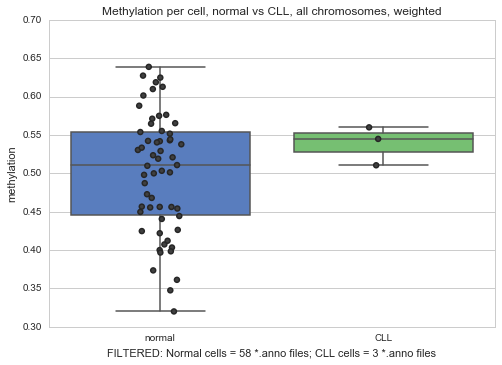

In [354]:
ax = sns.boxplot(x=final_real2["type"], y=final_real2["methylation"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")

In [355]:
print(norm['methylation'].mean())  # mean
print(cll['methylation'].mean())

print(norm['methylation'].std())   # standard deviation
print(cll['methylation'].std())

0.4999983836278535
0.5384558173586639
0.0774707844228754
0.02533418952759032


In [356]:
t, p = ttest_ind(norm.methylation, cll.methylation)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(norm.methylation, cll.methylation)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))
r'$A \times B$'

t-statistic is -0.851387682829
p-value is 0.397996480565
Mann-Whitney U statistic is 58.0
p-value is 0.341843922826


'$A \\times B$'

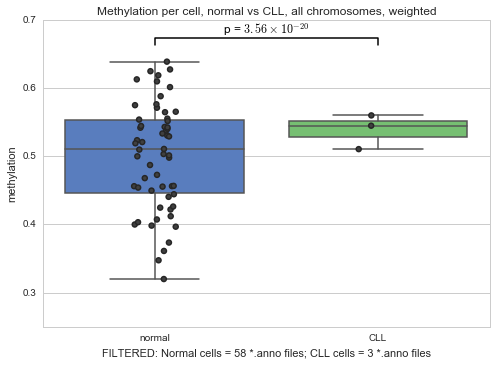

In [357]:
ax = sns.boxplot(x=final_real2["type"], y=final_real2["methylation"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = final_real2["methylation"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $3.56 \times 10^{-20}$', ha='center', va='bottom', color=col)
plt.savefig('methylation_weighted.eps', format='eps', dpi=1000000)

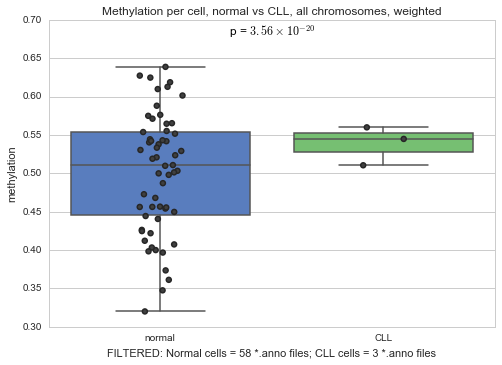

In [358]:
ax = sns.boxplot(x=final_real2["type"], y=final_real2["methylation"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = final_real2["methylation"].max() + .025, .01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $3.56 \times 10^{-20}$', ha='center', va='bottom', color=col)


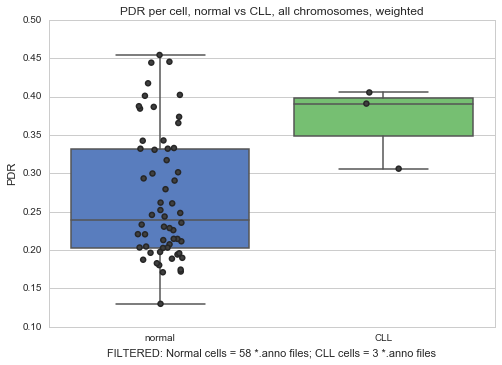

In [359]:
# PDR total

ax = sns.boxplot(x=final_real2["type"], y=final_real2["PDR_total"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["PDR_total"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("PDR")

In [360]:
print(norm['PDR_total'].mean())  # mean
print(cll['PDR_total'].mean())

print(norm['PDR_total'].std())   # standard deviation
print(cll['PDR_total'].std())

0.2689998834043529
0.367487025851839
0.08352596044747658
0.05365938106810654


In [361]:
t, p = ttest_ind(norm.PDR_total, cll.PDR_total)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(norm.PDR_total, cll.PDR_total)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))


t-statistic is -2.01156629013
p-value is 0.0488402639898
Mann-Whitney U statistic is 28.0
p-value is 0.0510470260205


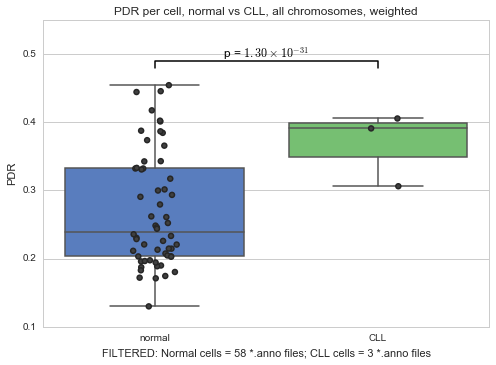

In [362]:

ax = sns.boxplot(x=final_real2["type"], y=final_real2["PDR_total"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["PDR_total"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = final_real2["PDR_total"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $1.30 \times 10^{-31}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR")
plt.savefig('PDR_normal_CLL_weighted.eps', format='eps', dpi=1000000)

In [363]:
final_real2.columns

Index(['filename', 'protocol', 'type', 'bio', 'total_reads', 'totCpG',
       'bsRate', 'methylation', 'PDR_total', 'avgReadCpGs_lessthan1filter',
       'avgReadCpGs_lesseql3.8filter', 'PDR_unweighted',
       'methylation_unweighted'],
      dtype='object')

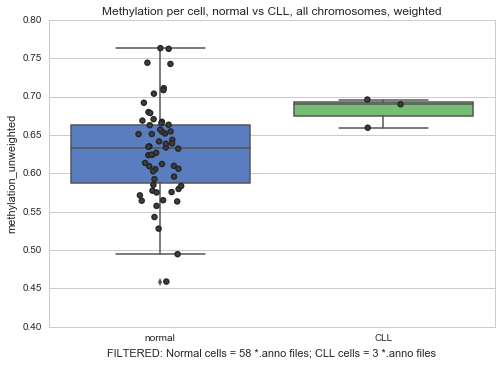

In [364]:
ax = sns.boxplot(x=final_real2["type"], y=final_real2["methylation_unweighted"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")

In [365]:
print(norm['methylation_unweighted'].mean())  # mean
print(cll['methylation_unweighted'].mean())

print(norm['methylation_unweighted'].std())   # standard deviation
print(cll['methylation_unweighted'].std())

0.6288281115038497
0.6818953274348202
0.060451446816768506
0.01967473234405108


In [366]:
t, p = ttest_ind(norm.methylation_unweighted, cll.methylation_unweighted)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(norm.methylation_unweighted, cll.methylation_unweighted)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is -1.50560937511
p-value is 0.137502811892
Mann-Whitney U statistic is 31.0
p-value is 0.0641654336808


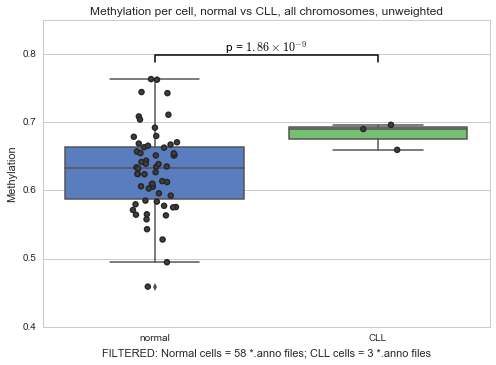

In [367]:
ax = sns.boxplot(x=final_real2["type"], y=final_real2["methylation_unweighted"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, normal vs CLL, all chromosomes, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = final_real2["methylation_unweighted"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $1.86 \times 10^{-9}$', ha='center', va='bottom', color=col)
plt.ylabel("Methylation")
plt.savefig('methylation_unweighted.eps', format='eps', dpi=1000000)

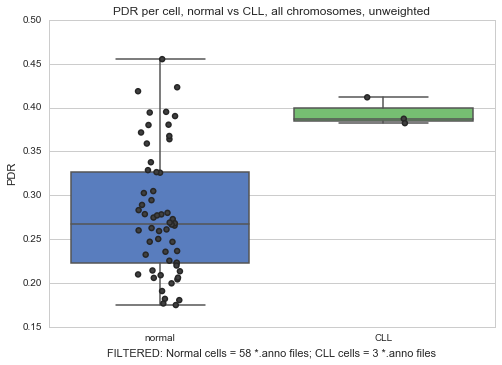

In [368]:
# PDR total

ax = sns.boxplot(x=final_real2["type"], y=final_real2["PDR_unweighted"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["PDR_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, normal vs CLL, all chromosomes, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.ylabel("PDR")

In [369]:
print(norm['PDR_unweighted'].mean())  # mean
print(cll['PDR_unweighted'].mean())

print(norm['PDR_unweighted'].std())   # standard deviation
print(cll['PDR_unweighted'].std())

0.2787987473337799
0.3937519284111091
0.07077682056366114
0.015755742441401897


In [370]:
t, p = ttest_ind(norm.PDR_unweighted, cll.PDR_unweighted)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(norm.PDR_unweighted, cll.PDR_unweighted)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is -2.78837371687
p-value is 0.00711890855076
Mann-Whitney U statistic is 15.0
p-value is 0.0170949816105


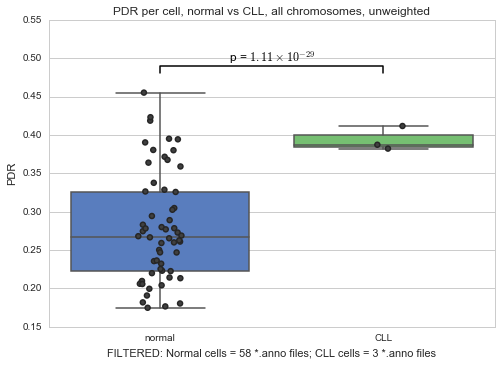

In [371]:
ax = sns.boxplot(x=final_real2["type"], y=final_real2["PDR_unweighted"], linewidth=1.5)
ax = sns.stripplot(x=final_real2["type"], y=final_real2["PDR_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, normal vs CLL, all chromosomes, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = final_real2["PDR_unweighted"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $1.11 \times 10^{-29}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR")
plt.savefig('PDR_normal_CLL_unweighted.eps', format='eps', dpi=1000000)

In [372]:
CD27p = final_real2[final_real2['bio'] == 'CD19CD27p']
print(len(CD27p))
CD27m = final_real2[final_real2['bio'] == 'CD19CD27m']
print(len(CD27m))

20
13


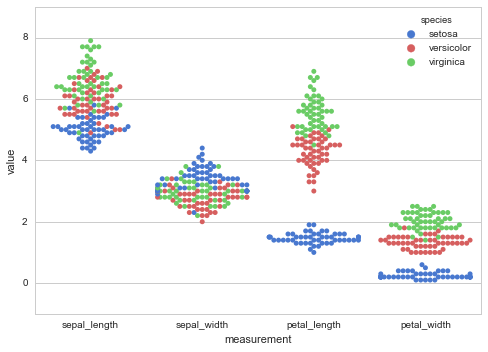

In [373]:
SEABORN_PALETTES = dict(
    deep=["#4C72B0", "#55A868", "#C44E52",
          "#8172B2", "#CCB974", "#64B5CD"],
    muted=["#4878CF", "#6ACC65", "#D65F5F",
           "#B47CC7", "#C4AD66", "#77BEDB"],
    pastel=["#92C6FF", "#97F0AA", "#FF9F9A",
            "#D0BBFF", "#FFFEA3", "#B0E0E6"],
    bright=["#003FFF", "#03ED3A", "#E8000B",
            "#8A2BE2", "#FFC400", "#00D7FF"],
    dark=["#001C7F", "#017517", "#8C0900",
          "#7600A1", "#B8860B", "#006374"],
    colorblind=["#0072B2", "#009E73", "#D55E00",
                "#CC79A7", "#F0E442", "#56B4E9"]
    )

sns.set(style="whitegrid", palette="muted")
iris     = sns.load_dataset("iris")
iris     = pd.melt(iris, "species", var_name="measurement")
muted    = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(setosa = muted[0], versicolor = muted[2], virginica = muted[1])
sns.swarmplot(x="measurement", y="value", hue="species", data=iris,palette=newPal )

In [374]:
CD27p = final_real2[final_real2['bio'] == 'CD19CD27p']
print(len(CD27p))
CD27m = final_real2[final_real2['bio'] == 'CD19CD27m']
print(len(CD27m))

20
13


In [375]:
# CD19CD27m

CD27cells = pd.concat([CD27p, CD27m])

In [376]:
CD27cells = CD27cells.reset_index(drop=True)

In [377]:
CD27cells.shape

(33, 13)

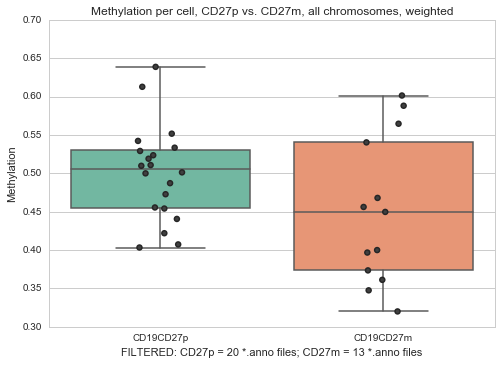

In [378]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["methylation"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, CD27p vs. CD27m, all chromosomes, weighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
plt.ylabel("Methylation")

In [379]:
print(CD27p['methylation'].mean())  # mean
print(CD27m['methylation'].mean())

print(CD27p['methylation'].std())   # standard deviation
print(CD27m['methylation'].std())

0.5007884618257911
0.45135372469611
0.061587198490924935
0.09579820923120198


In [380]:
t, p = ttest_ind(CD27p.methylation, CD27m.methylation)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CD27p.methylation, CD27m.methylation)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is 1.80998701259
p-value is 0.0800023587098
Mann-Whitney U statistic is 86.0
p-value is 0.108999672232


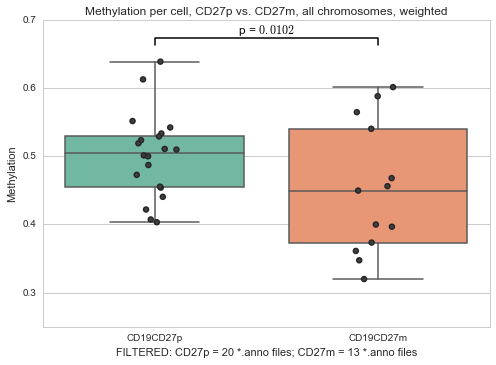

In [381]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["methylation"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["methylation"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, CD27p vs. CD27m, all chromosomes, weighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = CD27cells["methylation"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $0.0102$', ha='center', va='bottom', color=col)
plt.ylabel("Methylation")
plt.savefig('methylation_CD27p_CD27m_weighted.eps', format='eps', dpi=1000000)

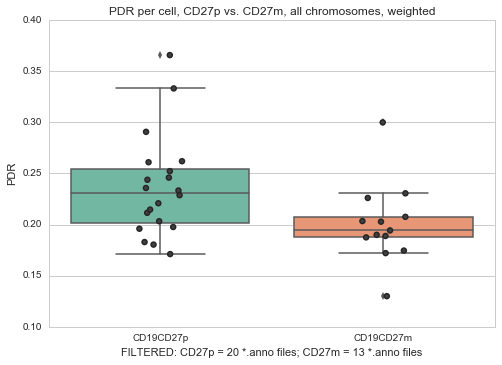

In [382]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["PDR_total"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["PDR_total"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, CD27p vs. CD27m, all chromosomes, weighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
plt.ylabel("PDR")

In [383]:
print(CD27p['PDR_total'].mean())  # mean
print(CD27m['PDR_total'].mean())

print(CD27p['PDR_total'].std())   # standard deviation
print(CD27m['PDR_total'].std())

0.23644521090749865
0.20051035765113107
0.04949659040573162
0.039154308239242555


In [384]:
t, p = ttest_ind(CD27p.PDR_total, CD27m.PDR_total)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CD27p.PDR_total, CD27m.PDR_total)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is 2.20370462
p-value is 0.0351017623764
Mann-Whitney U statistic is 68.0
p-value is 0.023457868683


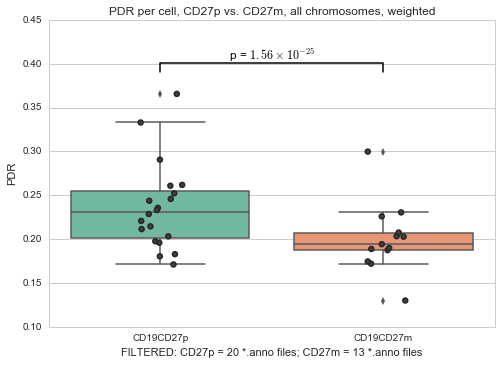

In [385]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["PDR_total"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["PDR_total"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, CD27p vs. CD27m, all chromosomes, weighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = CD27cells["PDR_total"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $1.56 \times 10^{-25}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR")
plt.savefig('PDR_CD27p_CD27m_weighted.eps', format='eps', dpi=1000000)

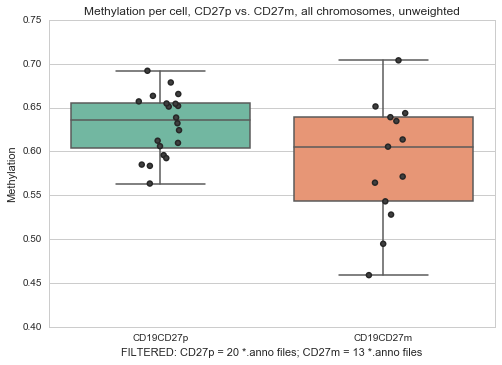

In [386]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["methylation_unweighted"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["methylation_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, CD27p vs. CD27m, all chromosomes, unweighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
plt.ylabel("Methylation")

In [387]:
print(CD27p['methylation_unweighted'].mean())  # mean
print(CD27m['methylation_unweighted'].mean())

print(CD27p['methylation_unweighted'].std())   # standard deviation
print(CD27m['methylation_unweighted'].std())

0.6305808479176566
0.5886075616058045
0.035585999404193
0.06958257476539205


In [388]:
t, p = ttest_ind(CD27p.methylation_unweighted, CD27m.methylation_unweighted)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CD27p.methylation_unweighted, CD27m.methylation_unweighted)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is 2.28848865031
p-value is 0.0290836203537
Mann-Whitney U statistic is 79.0
p-value is 0.0627989580936


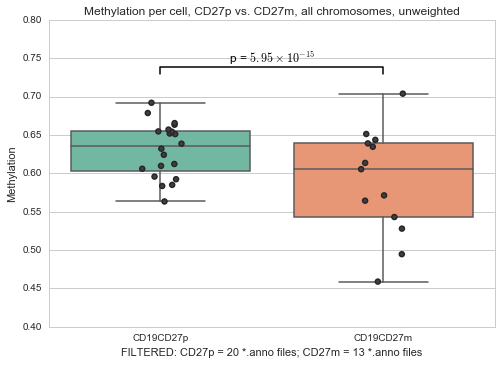

In [389]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["methylation_unweighted"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["methylation_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation per cell, CD27p vs. CD27m, all chromosomes, unweighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = CD27cells["methylation_unweighted"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $5.95 \times 10^{-15}$', ha='center', va='bottom', color=col)
plt.ylabel("Methylation")
plt.savefig('methylation_CD27p_CD27m_unweighted.eps', format='eps', dpi=1000000)

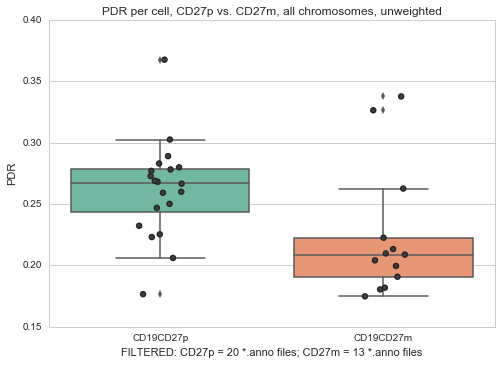

In [390]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["PDR_unweighted"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["PDR_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, CD27p vs. CD27m, all chromosomes, unweighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
plt.ylabel("PDR")

In [391]:
print(CD27p['PDR_unweighted'].mean())  # mean
print(CD27m['PDR_unweighted'].mean())

print(CD27p['PDR_unweighted'].std())   # standard deviation
print(CD27m['PDR_unweighted'].std())

0.26167683639116174
0.22405022591811083
0.03943056063218194
0.05294277902142985


In [392]:
t, p = ttest_ind(CD27p.PDR_unweighted, CD27m.PDR_unweighted)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CD27p.PDR_unweighted, CD27m.PDR_unweighted)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is 2.3395376675
p-value is 0.0259255754264
Mann-Whitney U statistic is 60.0
p-value is 0.0104478193309


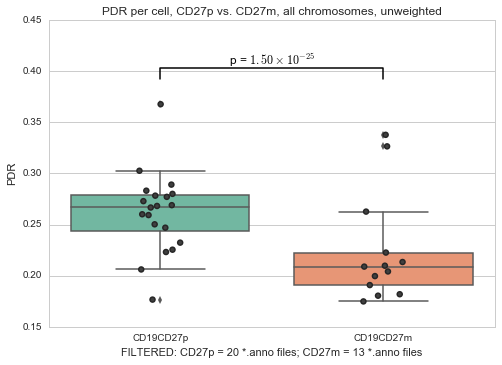

In [393]:
ax = sns.boxplot(x=CD27cells["bio"], y=CD27cells["PDR_unweighted"], linewidth=1.5, palette='Set2')
ax = sns.stripplot(x=CD27cells["bio"], y=CD27cells["PDR_unweighted"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR per cell, CD27p vs. CD27m, all chromosomes, unweighted")
plt.xlabel("FILTERED: CD27p = 20 *.anno files; CD27m = 13 *.anno files")
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = CD27cells["PDR_unweighted"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $1.50 \times 10^{-25}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR")
plt.savefig('PDR_CD27p_CD27m_unweighted.eps', format='eps', dpi=1000000)

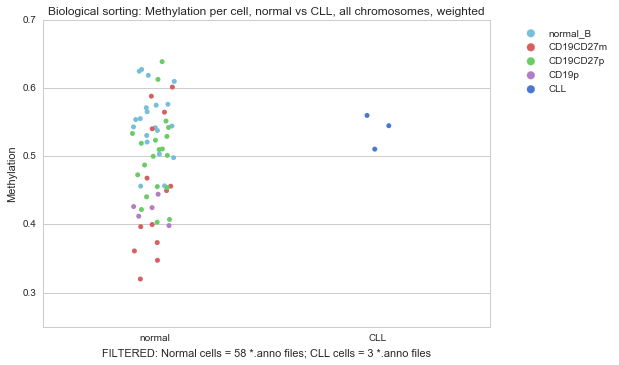

In [394]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
muted = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(normal_B = muted[5], CD19CD27m = muted[2],CD19CD27p = muted[1], CD19p = muted[3], CLL=muted[0])
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation"], hue=final_real2.bio, jitter=True, palette=newPal)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Methylation")

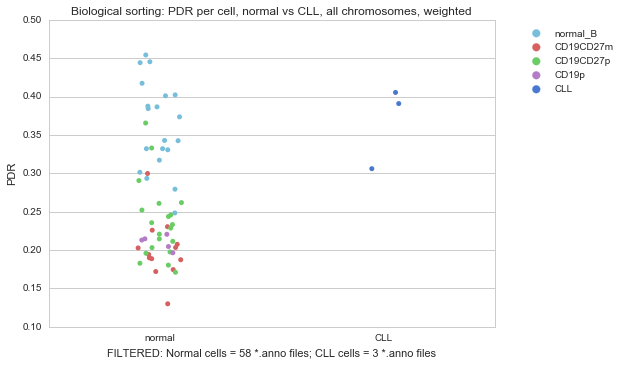

In [395]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
muted = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(normal_B = muted[5], CD19CD27m = muted[2],CD19CD27p = muted[1], CD19p = muted[3], CLL=muted[0])
ax = sns.stripplot(x=final_real2["type"], y=final_real2["PDR_total"], hue=final_real2.bio, jitter=True, palette=newPal)
sns.plt.title("Biological sorting: PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("PDR")

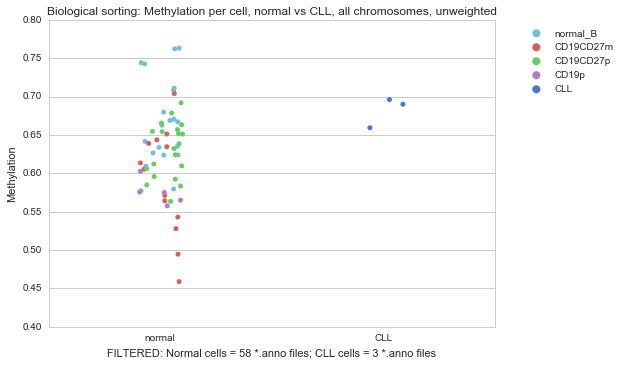

In [396]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
muted = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(normal_B = muted[5], CD19CD27m = muted[2],CD19CD27p = muted[1], CD19p = muted[3], CLL=muted[0])
ax = sns.stripplot(x=final_real2["type"], y=final_real2["methylation_unweighted"], hue=final_real2.bio, jitter=True, palette=newPal)
sns.plt.title("Biological sorting: Methylation per cell, normal vs CLL, all chromosomes, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Methylation")

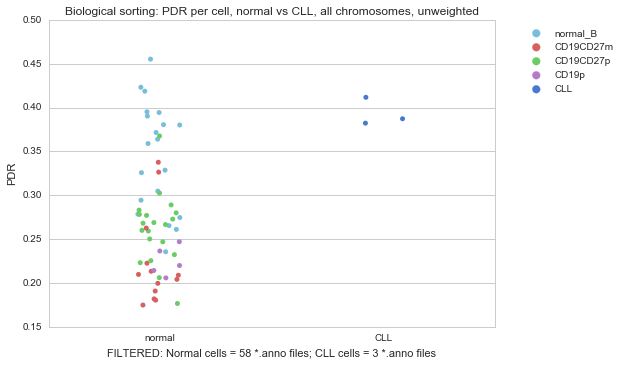

In [397]:
sns.set(style="whitegrid", palette="muted")
muted = ["#4878CF", "#6ACC65", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
newPal   = dict(normal_B = muted[5], CD19CD27m = muted[2],CD19CD27p = muted[1], CD19p = muted[3], CLL=muted[0])
ax = sns.stripplot(x=final_real2["type"], y=final_real2["PDR_unweighted"], hue=final_real2.bio, jitter=True, palette=newPal)
sns.plt.title("Biological sorting: PDR per cell, normal vs CLL, all chromosomes, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("PDR")

In [398]:
final_real2

,filename,protocol,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,PDR_unweighted,methylation_unweighted
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385,4.967978,6.559853,0.265385,0.763173
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654,5.199253,6.936735,0.358995,0.710998
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361,5.063584,6.700637,0.418670,0.641666
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256,4.822266,6.531186,0.395132,0.626723
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149,5.016464,6.704903,0.328656,0.623994
5,RRBS_normal_B_cell_B1_24_CGTACTAG.AGGATG,normal_B_cell_B1_24,normal,normal_B,19776.0,13240,0.959328,0.627377,0.248382,5.044509,6.548238,0.235607,0.762334
6,RRBS_normal_B_cell_B1_24_CGTACTAG.ATCGAC,normal_B_cell_B1_24,normal,normal_B,19826.0,13086,0.961218,0.609856,0.332140,5.011048,6.657233,0.261056,0.708471
7,RRBS_normal_B_cell_B1_24_CGTACTAG.GCTGCC,normal_B_cell_B1_24,normal,normal_B,12769.0,8256,0.958399,0.537865,0.301433,5.232078,6.910150,0.278496,0.668736
8,RRBS_normal_B_cell_C1_24_AGGCAGAA.CCTTCG,normal_B_cell_C1_24,normal,normal_B,15366.0,12792,0.959522,0.543082,0.386633,5.190345,6.810388,0.390314,0.667207
9,RRBS_normal_B_cell_C1_24_AGGCAGAA.CTCAGC,normal_B_cell_C1_24,normal,normal_B,13746.0,9091,0.960887,0.571221,0.317183,5.112565,6.780239,0.274596,0.744190


In [399]:
normal_B_filtered = pd.read_csv("total_read_CpGs_normal_B_cellA1H1_withFilter.csv")
normal_B_unfiltered = pd.read_csv("total_read_CpGs_normal_B_cellA1H1_noFilter.csv")
CD27pcell_filtered = pd.read_csv("total_read_CpGs_pCD27pcell_withFilter.csv")
CD27pcell_unfiltered = pd.read_csv("total_read_CpGs_pCD27pcell_noFilter.csv")
CD27mcell_filtered = pd.read_csv("total_read_CpGs_pCD27mcell_withFilter.csv")
CD27mcell_unfiltered = pd.read_csv("total_read_CpGs_pCD27mcell_noFilter.csv")
NormalBCD19pcell_filtered = pd.read_csv("total_read_CpGs_NormalBCD19pcell_withFilter.csv")
NormalBCD19pcell_unfiltered = pd.read_csv("total_read_CpGs_NormalBCD19pcell_noFilter.csv")
trito_both = pd.read_csv("total_read_CpGs_CLL_RRBS_trito_pool_noFilter.csv")
cll_cw154_filtered = pd.read_csv("total_read_CpGs_CLL_cw154_withFilter.csv")
cll_cw154_unfiltered = pd.read_csv("total_read_CpGs_CLL_cw154_noFilter.csv")

normal_B_filtered = normal_B_filtered.drop(["Unnamed: 0"], axis=1)
normal_B_unfiltered = normal_B_unfiltered.drop(["Unnamed: 0"], axis=1)
CD27pcell_filtered = CD27pcell_filtered.drop(["Unnamed: 0"], axis=1)
CD27pcell_unfiltered = CD27pcell_unfiltered.drop(["Unnamed: 0"], axis=1)
CD27mcell_filtered = CD27mcell_filtered.drop(["Unnamed: 0"], axis=1)
CD27mcell_unfiltered = CD27mcell_unfiltered.drop(["Unnamed: 0"], axis=1)
NormalBCD19pcell_filtered = NormalBCD19pcell_filtered.drop(["Unnamed: 0"], axis=1)
NormalBCD19pcell_unfiltered = NormalBCD19pcell_unfiltered.drop(["Unnamed: 0"], axis=1)
trito_both = trito_both.drop(["Unnamed: 0"], axis=1)
cll_cw154_filtered = cll_cw154_filtered.drop(["Unnamed: 0"], axis=1)
cll_cw154_unfiltered = cll_cw154_unfiltered.drop(["Unnamed: 0"], axis=1)


In [400]:
all_files = [normal_B_filtered, CD27pcell_filtered, CD27mcell_filtered, NormalBCD19pcell_filtered, trito_both, cll_cw154_filtered]

In [537]:
len(all_files)

6

In [401]:
all_files_filtered1 = pd.concat(all_files)


In [402]:
type(all_files_filtered1)

pandas.core.frame.DataFrame

In [538]:
all_files_filtered1

,filename,total_reads,total_unique_CpGs
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,11894660.0,147675.0
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,10461874.0,151692.0
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,21928743.0,234318.0
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.ATAGCG,10864882.0,136377.0
4,RRBS_normal_B_cell_A1_24_TAAGGCGA.ATCGAC,18977710.0,227186.0
5,RRBS_normal_B_cell_A1_24_TAAGGCGA.CAAGAG,15806813.0,203192.0
6,RRBS_normal_B_cell_A1_24_TAAGGCGA.CATGAC,18369519.0,240971.0
7,RRBS_normal_B_cell_A1_24_TAAGGCGA.CGGTAG,11929945.0,154221.0
8,RRBS_normal_B_cell_A1_24_TAAGGCGA.CTATTG,22563380.0,240603.0
9,RRBS_normal_B_cell_A1_24_TAAGGCGA.CTCAGC,11977642.0,162593.0


In [403]:
all_files_filtered1 = all_files_filtered1.reset_index(drop=True)

In [404]:
big_stats_file = final_real2.merge(all_files_filtered1)

In [405]:
big_stats_file = big_stats_file.drop("totCpG", axis=1)

In [406]:
big_stats_file.to_csv('RRBS_stats_filtered_reads.csv', index=False)

In [539]:
final_real2.shape

(61, 13)

In [540]:
final_real2.to_csv('RRBS_stats_filtered_reads.csv', index=False)

In [407]:
cpg1 = pd.read_csv('Meth_PDR_cell_RRBS_normal_B1_CpGs.csv')
cpg1 = cpg1.drop(["Unnamed: 0"], axis=1)  
cpg1["filename"] = cpg1["filename"].str[:40]

cpg2 = pd.read_csv('NormalBCD19pCD27pcell_CpGs.csv')
cpg2 = cpg2.drop(["Unnamed: 0"], axis=1)  
cpg2["filename"] = cpg2["filename"].str[:50]
cpg2["filename"] = cpg2["filename"].str.replace(r'.dan$', '')
cpg2["filename"] = cpg2["filename"].str.replace(r'.da$', '')

cpg3 = pd.read_csv("NormalBCD19pCD27mcell_CpGs.csv")
cpg3 = cpg3.drop(["Unnamed: 0"], axis=1)  
cpg3["filename"] = cpg3["filename"].str[:50]
cpg3["filename"] = cpg3["filename"].str.replace(r'.dan$', '')
cpg3["filename"] = cpg3["filename"].str.replace(r'.da$', '')

cpg4 = pd.read_csv('CLL_RRBS_cw154_A_CpGs.csv')
cpg4 = cpg4.drop(["Unnamed: 0"], axis=1)  
cpg4["filename"] = cpg4["filename"].str[:51]
cpg4["filename"] = cpg4["filename"].str.replace(r'.da$', '')
cpg4["filename"] = cpg4["filename"].str.replace(r'.annoRR$', '')
cpg4["filename"] = cpg4["filename"].str.replace(r'.ann$', '')
cpg4["filename"] = cpg4["filename"].str.replace(r'.dan$', '')

cpg5 = pd.read_csv('Meth_PDR_cell_RRBS_trito_pool_CpGs.csv')
cpg5 = cpg5.drop(["Unnamed: 0"], axis=1) 
cpg5["filename"] = cpg5["filename"].str[:33]


cpg6 = pd.read_csv('NormalBCD19pcell_CpGs.csv')


In [408]:
all_mean_cpg = pd.concat([cpg1, cpg2, cpg3, cpg4, cpg5, cpg6])

In [409]:
all_mean_cpg = all_mean_cpg.reset_index(drop=True) 

In [410]:
all_mean_cpg = all_mean_cpg[["filename", "avgReadCpGs_mean", "avgReadCpGs_median"]]

In [411]:
merged = all_mean_cpg.merge(final_real2, on="filename")

In [412]:
merged.head()

,filename,avgReadCpGs_mean,avgReadCpGs_median,protocol,type,bio,total_reads,totCpG,bsRate,methylation,PDR_total,avgReadCpGs_lessthan1filter,avgReadCpGs_lesseql3.8filter,PDR_unweighted,methylation_unweighted
0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,4.950166,4.0,normal_B_cell_A1_24,normal,normal_B,14051.0,6950,0.958175,0.618746,0.384385,4.967978,6.559853,0.265385,0.763173
1,RRBS_normal_B_cell_A1_24_TAAGGCGA.CCTTCG,5.510949,5.0,normal_B_cell_A1_24,normal,normal_B,4828.0,3567,0.960501,0.553853,0.373654,5.199253,6.936735,0.358995,0.710998
2,RRBS_normal_B_cell_A1_24_TAAGGCGA.GCATTC,4.925000,4.0,normal_B_cell_A1_24,normal,normal_B,4070.0,1823,0.955798,0.498034,0.279361,5.063584,6.700637,0.418670,0.641666
3,RRBS_normal_B_cell_A1_24_TAAGGCGA.TGCTGC,4.760664,4.0,normal_B_cell_A1_24,normal,normal_B,14710.0,6931,0.931093,0.541876,0.444256,4.822266,6.531186,0.395132,0.626723
4,RRBS_normal_B_cell_B1_24_CGTACTAG.ACGTGG,5.257048,4.0,normal_B_cell_B1_24,normal,normal_B,24212.0,17017,0.943622,0.530481,0.332149,5.016464,6.704903,0.328656,0.623994


In [413]:
merged.shape

(61, 15)

In [414]:
import statsmodels.api as sm

In [415]:
tritopool = merged[merged["protocol"] == 'trito_pool_1']
tritopool = tritopool.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopoolA = tritopool.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool.filename,2))
out = pd.DataFrame([tritopoolA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool.methylation_unweighted, tritopool.methylation_unweighted)), tritopool.filename, tritopool.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs = pd.merge(out, methylation_differences, how='inner')
print(pairs.shape)


(0, 2)


In [416]:
tritopool2 = merged[merged["protocol"] == 'trito_pool_2']
tritopool2 = tritopool2.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopool2A = tritopool2.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool2.filename,2))
out = pd.DataFrame([tritopool2A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool2.methylation_unweighted, tritopool2.methylation_unweighted)), tritopool2.filename, tritopool2.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs1a = pd.merge(out, methylation_differences, how='inner')
print(pairs1a.shape)


(0, 2)


In [417]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.methylation_unweighted, cw154.methylation_unweighted)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2 = pd.merge(out, methylation_differences, how='inner')
pairs2 = pairs2.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs2.shape)

(0, 2)


In [418]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease_GR']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.methylation_unweighted, cw154.methylation_unweighted)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2a = pd.merge(out, methylation_differences, how='inner')
pairs2a = pairs2a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs2a.shape)

(0, 2)


In [419]:
# cw154_CutSmart_proteinase_K
cw154 = merged[merged["protocol"] == 'cw154_CutSmart_proteinase_K']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.methylation_unweighted, cw154.methylation_unweighted)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2b = pd.merge(out, methylation_differences, how='inner')
pairs2b = pairs2b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs2b.shape)

(0, 2)


In [420]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell1_22_']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations  
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.methylation_unweighted, pcell.methylation_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3 = pd.merge(out, methylation_differences, how='inner')
pairs3 = pairs3.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs3.shape)

(6, 12)


In [421]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell23_44']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.methylation_unweighted, pcell.methylation_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3a = pd.merge(out, methylation_differences, how='inner')
pairs3a = pairs3a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs3a.shape)

(0, 2)


In [422]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell45_66']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.methylation_unweighted, pcell.methylation_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3b = pd.merge(out, methylation_differences, how='inner')
pairs3b = pairs3b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs3b.shape)

(78, 12)


In [423]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell67_88']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.methylation_unweighted, pcell.methylation_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3c = pd.merge(out, methylation_differences, how='inner')
pairs3c = pairs3c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs3c.shape)

(1, 12)


In [424]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell1_22_']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.methylation_unweighted, mcell.methylation_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4 = pd.merge(out, methylation_differences, how='inner')
pairs4 = pairs4.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs4.shape)

(6, 12)


In [425]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell23_44']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.methylation_unweighted, mcell.methylation_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4a = pd.merge(out, methylation_differences, how='inner')
pairs4a = pairs4a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs4a.shape)

(3, 12)


In [426]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell45_66']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.methylation_unweighted, mcell.methylation_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4b = pd.merge(out, methylation_differences, how='inner')
pairs4b = pairs4b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs4b.shape)

(10, 12)


In [427]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell67_88']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.methylation_unweighted, mcell.methylation_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4c = pd.merge(out, methylation_differences, how='inner')
pairs4c = pairs4c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [428]:
normb = merged[merged["protocol"] == 'normal_B_cell_A1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5 = pd.merge(out, methylation_differences, how='inner')
pairs5 = pairs5.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5.shape)

(6, 12)


In [429]:
normb = merged[merged["protocol"] == 'normal_B_cell_B1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5a = pd.merge(out, methylation_differences, how='inner')
pairs5a = pairs5a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5a.shape)

(6, 12)


In [430]:
normb = merged[merged["protocol"] == 'normal_B_cell_C1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5b = pd.merge(out, methylation_differences, how='inner')
pairs5b = pairs5b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5b.shape)

(1, 12)


In [431]:
normb = merged[merged["protocol"] == 'normal_B_cell_D1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5c = pd.merge(out, methylation_differences, how='inner')
pairs5c = pairs5c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5c.shape)

(0, 2)


In [432]:
normb = merged[merged["protocol"] == 'normal_B_cell_G1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5d = pd.merge(out, methylation_differences, how='inner')
pairs5d = pairs5d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5d.shape)

(3, 12)


In [433]:
normb = merged[merged["protocol"] == 'normal_B_cell_H1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5e = pd.merge(out, methylation_differences, how='inner')
pairs5e = pairs5e.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5e.shape)

(15, 12)


In [434]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell1_22_']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6a = pd.merge(out, methylation_differences, how='inner')
pairs6a = pairs6a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs6a.shape)

(0, 2)


In [435]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell23_44']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6b = pd.merge(out, methylation_differences, how='inner')
pairs6b = pairs6b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs6b.shape)

(1, 12)


In [436]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell45_66']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6c = pd.merge(out, methylation_differences, how='inner')
pairs6c = pairs6c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs6c.shape)

(0, 2)


In [437]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell67_88']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.methylation_unweighted, normb.methylation_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
methylation_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'methylation_difference': stacked})[['filename', 'methylation_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6d = pd.merge(out, methylation_differences, how='inner')
pairs6d = pairs6d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs6d.shape)

(1, 12)


In [438]:
pairs['type'] = str('CLL')
pairs['bio'] = str('CLL')
pairs['protocol'] = str('trito_pool_1')


pairs1a['type'] = str('CLL')
pairs1a['bio'] = str('CLL')
pairs1a['protocol'] = str('trito_pool_2')


pairs2['type'] = str('CLL')
pairs2['bio'] = str('CLL')
pairs2['protocol'] = str('cw154_Tris_protease')


pairs2a['type'] = str('CLL')
pairs2a['bio'] = str('CLL')   
pairs2a['protocol'] = str('cw154_Tris_protease_GR')


pairs2b['type'] = str('CLL')
pairs2b['bio'] = str('CLL')
pairs2b['protocol'] = str('cw154_CutSmart_proteinase_K')



pairs3['type'] = str('normal')
pairs3['bio'] = str('CD27p')
pairs3['protocol'] = str('NormalBCD19pCD27pcell1_22_')



pairs3a['type'] = str('normal')
pairs3a['bio'] = str('CD27p')
pairs3a['protocol'] = str('NormalBCD19pCD27pcell23_44')


pairs3b['type'] = str('normal')
pairs3b['bio'] = str('CD27p')
pairs3b['protocol'] = str('NormalBCD19pCD27pcell45_66')



pairs3c['type'] = str('normal')
pairs3c['bio'] = str('CD27p')
pairs3c['protocol'] = str('NormalBCD19pCD27pcell67_88')



pairs4['type'] = str('normal')
pairs4['bio'] = str('CD27m')
pairs4['protocol'] = str('NormalBCD19pCD27mcell1_22_')



pairs4a['type'] = str('normal')
pairs4a['bio'] = str('CD27m')
pairs4a['protocol'] = str('NormalBCD19pCD27mcell23_44')



pairs4b['type'] = str('normal')
pairs4b['bio'] = str('CD27m')
pairs4b['protocol'] = str('NormalBCD19pCD27mcell45_66')


pairs4c['type'] = str('normal')
pairs4c['bio'] = str('CD27m')
pairs4c['protocol'] = str('NormalBCD19pCD27mcell67_88')



pairs5['type'] = str('normal')
pairs5['bio'] = str('normal_B')
pairs5['protocol'] = str('normal_B_cell_A1')


pairs5a['type'] = str('normal')
pairs5a['bio'] = str('normal_B')
pairs5a['protocol'] = str('normal_B_cell_B1')



pairs5b['type'] = str('normal')
pairs5b['bio'] = str('normal_B')
pairs5b['protocol'] = str('normal_B_cell_C1')


pairs5c['type'] = str('normal')
pairs5c['bio'] = str('normal_B')
pairs5c['protocol'] = str('normal_B_cell_D1')


pairs5d['type'] = str('normal')
pairs5d['bio'] = str('normal_B')
pairs5d['protocol'] = str('normal_B_cell_G1')


pairs5e['type'] = str('normal')
pairs5e['bio'] = str('normal_B')
pairs5e['protocol'] = str('normal_B_cell_H1')







pairs6a['type'] = str('normal')
pairs6a['bio'] = str('CD19p')
pairs6a['protocol'] = str('NormalBCD19pcell1_22_')


pairs6b['type'] = str('normal')
pairs6b['bio'] = str('CD19p')
pairs6b['protocol'] = str('NormalBCD19pcell23_44')


pairs6c['type'] = str('normal')
pairs6c['bio'] = str('CD19p')
pairs6c['protocol'] = str('NormalBCD19pcell45_66')


pairs6d['type'] = str('normal')
pairs6d['bio'] = str('CD19p')
pairs6d['protocol'] = str('NormalBCD19pcell67_88')




In [439]:
frames22 = [pairs, pairs1a, pairs2, pairs2a, pairs2b, pairs3, pairs3a, pairs3b, 
            pairs3c, pairs4a, pairs4b, pairs4c, pairs5, pairs5a, pairs5b, pairs5c, pairs5d, pairs5e, pairs6a, pairs6b, pairs6c, pairs6d]
total_pairs = pd.concat(frames22)


In [440]:
total_pairs.shape   #4281 total data points

(131, 15)

In [441]:
total_pairs.columns

Index(['PDR_total', 'PDR_unweighted', 'avgReadCpGs_lesseql3.8filter',
       'avgReadCpGs_lessthan1filter', 'avgReadCpGs_mean', 'bio', 'bsRate_mean',
       'filename', 'methylation', 'methylation_difference',
       'methylation_unweighted', 'protocol', 'totCpG', 'total_reads_mean',
       'type'],
      dtype='object')

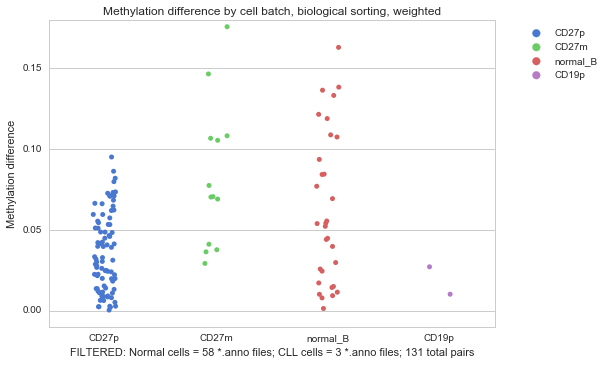

In [442]:
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], hue=total_pairs.bio, jitter=True)
sns.plt.title("Methylation difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.18)
plt.ylabel("Methylation difference")

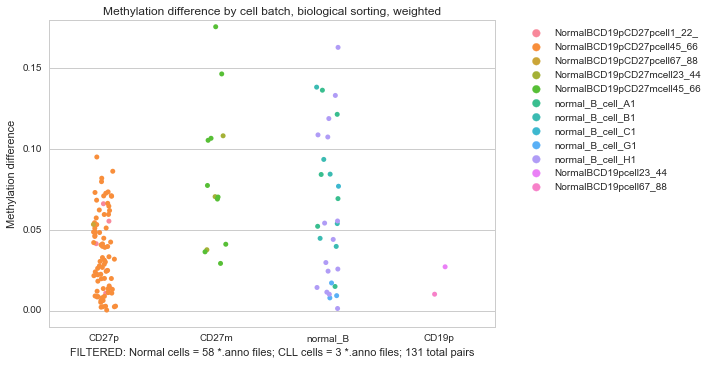

In [443]:
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], hue=total_pairs.protocol, jitter=True)
sns.plt.title("Methylation difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.18)
plt.ylabel("Methylation difference")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


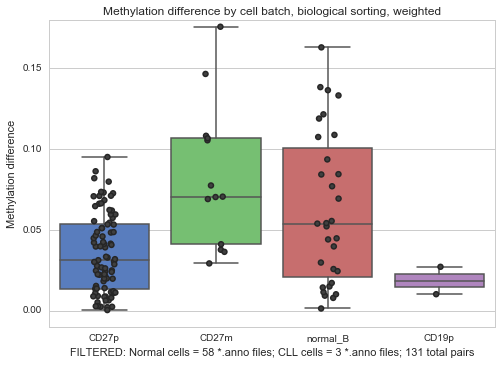

In [444]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], linewidth=1.5)  
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.18)
plt.ylabel("Methylation difference")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


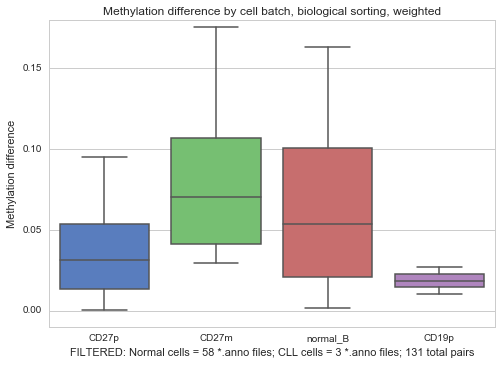

In [445]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], linewidth=1.5)  
sns.plt.title("Methylation difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.18)
plt.ylabel("Methylation difference")

In [446]:
CLL_stat = total_pairs[total_pairs["bio"]=="CLL"]
print(len(CLL_stat))
CD27p_stat = total_pairs[total_pairs["bio"]=="CD27p"]
print(len(CD27p_stat))
CD27m_stat = total_pairs[total_pairs["bio"]=="CD27m"]
print(len(CD27m_stat))
normalB_stat = total_pairs[total_pairs["bio"]=="normal_B"]
print(len(normalB_stat))
CD19p_stat = total_pairs[total_pairs["bio"]=="CD19p"]
print(len(CD19p_stat))


   
print(str("mean CLL ") + str(CLL_stat['methylation_difference'].mean()))  # mean
print(str("mean CD27p ") + str(CD27p_stat['methylation_difference'].mean()))
print(str("mean CD27m ") + str(CD27m_stat['methylation_difference'].mean()))
print(str("mean normalB ") + str(normalB_stat['methylation_difference'].mean()))
print(str("mean CD19p ") + str(CD19p_stat['methylation_difference'].mean()))

print(str("STD CLL ") + str(CLL_stat['methylation_difference'].std()))  # standard deviation
print(str("STD CD27p ") + str(CD27p_stat['methylation_difference'].std()))
print(str("STD CD27m ") + str(CD27m_stat['methylation_difference'].std()))
print(str("STD normalB ") + str(normalB_stat['methylation_difference'].std()))
print(str("STD CD19p ") + str(CD19p_stat['methylation_difference'].std()))


0
85
13
31
2
mean CLL nan
mean CD27p 0.035673129217064586
mean CD27m 0.08263930321525742
mean normalB 0.06279809171974174
mean CD19p 0.018634525811501046
STD CLL nan
STD CD27p 0.024125360162201383
STD CD27m 0.04448957820076536
STD normalB 0.046985572257803226
STD CD19p 0.011998339733660369


In [447]:
norm_meth_diff_frame = [CD27p_stat, CD27m_stat, normalB_stat, CD19p_stat]
meth_diff_norm  = pd.concat(norm_meth_diff_frame)
print(meth_diff_norm.shape)
print(CLL_stat.shape)


(131, 15)
(0, 15)


In [448]:

t, p = ttest_ind(CLL_stat.methylation_difference, meth_diff_norm.methylation_difference)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CLL_stat.methylation_difference, meth_diff_norm.methylation_difference)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))


t-statistic is nan
p-value is nan
Mann-Whitney U statistic is 0.0
p-value is 0.0


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


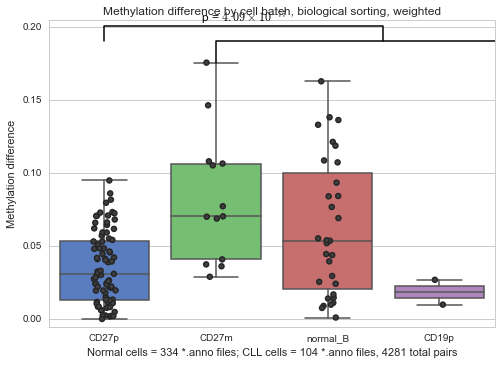

In [449]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], linewidth=1.5)  
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Methylation difference by cell batch, biological sorting, weighted")
plt.xlabel("Normal cells = 334 *.anno files; CLL cells = 104 *.anno files, 4281 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Methylation difference")
x1, x2 = 0, 2.5  
y, h, col = total_pairs["methylation_difference"].max() + .015, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
x11, x22 = 1, 4  
y1, h1, col = total_pairs["methylation_difference"].max(), .015, 'k'
plt.plot([x11, x11, x22, x22], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $4.09 \times 10^{-77}$', ha='center', va='bottom', color=col)
plt.ylim(-0.005, 0.205)
plt.savefig('Methylation_by_bio_type_weighted1.eps', format='eps', dpi=100000000)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


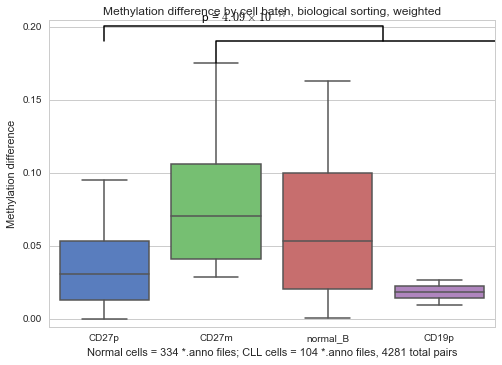

In [450]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["methylation_difference"], linewidth=1.5)  
sns.plt.title("Methylation difference by cell batch, biological sorting, weighted")
plt.xlabel("Normal cells = 334 *.anno files; CLL cells = 104 *.anno files, 4281 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("Methylation difference")
x1, x2 = 0, 2.5  
y, h, col = total_pairs["methylation_difference"].max() + .015, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
x11, x22 = 1, 4  
y1, h1, col = total_pairs["methylation_difference"].max(), .015, 'k'
plt.plot([x11, x11, x22, x22], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $4.09 \times 10^{-77}$', ha='center', va='bottom', color=col)
plt.ylim(-0.005, 0.205)
plt.savefig('Methylation_by_bio_type_weighted2.eps', format='eps', dpi=100000000)

In [451]:
cllstats = merged[merged['bio']=='CLL']
cd27pstats = merged[merged['bio']=='CD19CD27p']
cd27mstats = merged[merged['bio']=='CD19CD27m']
normalbstats = merged[merged['bio']=='normal_B']
cd19stats = merged[merged['bio']=='CD19p']


cllstats = cllstats.reset_index(drop=True)
cd27pstats = cd27pstats.reset_index(drop=True)  
cd27mstats = cd27mstats.reset_index(drop=True)  
normalbstats = normalbstats.reset_index(drop=True) 
cd19stats = cd19stats.reset_index(drop=True) 


print("Mean")
print(cllstats["PDR_total"].mean())
print(cd27pstats["PDR_total"].mean())
print(cd27mstats["PDR_total"].mean())
print(normalbstats["PDR_total"].mean())
print(cd19stats["PDR_total"].mean())

print("StD")
print(cllstats["PDR_total"].std())
print(cd27pstats["PDR_total"].std())
print(cd27mstats["PDR_total"].std())
print(normalbstats["PDR_total"].std())
print(cd19stats["PDR_total"].std())

Mean
0.367487025851839
0.23644521090749865
0.20051035765113107
0.36085530768930785
0.20986964321032575
StD
0.05365938106810654
0.04949659040573162
0.039154308239242555
0.0580191065662757
0.009423326497415832


In [452]:
merged.columns

Index(['filename', 'avgReadCpGs_mean', 'avgReadCpGs_median', 'protocol',
       'type', 'bio', 'total_reads', 'totCpG', 'bsRate', 'methylation',
       'PDR_total', 'avgReadCpGs_lessthan1filter',
       'avgReadCpGs_lesseql3.8filter', 'PDR_unweighted',
       'methylation_unweighted'],
      dtype='object')

In [453]:
tritopool = merged[merged["protocol"] == 'trito_pool_1']
tritopool = tritopool.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopoolA = tritopool.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool.filename,2))
out = pd.DataFrame([tritopoolA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool.PDR_total, tritopool.PDR_total)), tritopool.filename, tritopool.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs = pd.merge(out, pdr_differences, how='inner')
print(pairs.shape)
pairs = pairs.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

(0, 2)


In [454]:
tritopool2 = merged[merged["protocol"] == 'trito_pool_2']
tritopool2 = tritopool2.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopool2A = tritopool2.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool2.filename,2))
out = pd.DataFrame([tritopool2A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool2.PDR_total, tritopool2.PDR_total)), tritopool2.filename, tritopool2.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs1a = pd.merge(out, pdr_differences, how='inner')
print(pairs1a.shape)
pairs1a = pairs1a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

(0, 2)


In [455]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR_total, cw154.PDR_total)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2 = pd.merge(out, pdr_differences, how='inner')
pairs2 = pairs2.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [456]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease_GR']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR_total, cw154.PDR_total)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2a = pd.merge(out, pdr_differences, how='inner')
pairs2a = pairs2a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs2a.shape)

(0, 2)


In [457]:
cw154 = merged[merged["protocol"] == 'cw154_CutSmart_proteinase_K']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR_total, cw154.PDR_total)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2b = pd.merge(out, pdr_differences, how='inner')
pairs2b = pairs2b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [458]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell1_22_']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations  
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_total, pcell.PDR_total)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3 = pd.merge(out, pdr_differences, how='inner')
pairs3 = pairs3.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [459]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell23_44']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_total, pcell.PDR_total)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3a = pd.merge(out, pdr_differences, how='inner')
pairs3a = pairs3a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [460]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell45_66']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_total, pcell.PDR_total)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3b = pd.merge(out, pdr_differences, how='inner')
pairs3b = pairs3b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [461]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell67_88']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_total, pcell.PDR_total)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3c = pd.merge(out, pdr_differences, how='inner')
pairs3c = pairs3c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [462]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell1_22_']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_total, mcell.PDR_total)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4 = pd.merge(out, pdr_differences, how='inner')
pairs4 = pairs4.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [463]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell23_44']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_total, mcell.PDR_total)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4a = pd.merge(out, pdr_differences, how='inner')
pairs4a = pairs4a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [464]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell45_66']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_total, mcell.PDR_total)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4b = pd.merge(out, pdr_differences, how='inner')
pairs4b = pairs4b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [465]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell67_88']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_total, mcell.PDR_total)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4c = pd.merge(out, pdr_differences, how='inner')
pairs4c = pairs4c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs4c.shape)

(0, 2)


In [466]:
normb = merged[merged["protocol"] == 'normal_B_cell_A1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5 = pd.merge(out, pdr_differences, how='inner')
pairs5 = pairs5.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5.shape)

(6, 12)


In [467]:
normb = merged[merged["protocol"] == 'normal_B_cell_B1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5a = pd.merge(out, pdr_differences, how='inner')
pairs5a = pairs5a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5a.shape)

(6, 12)


In [468]:
normb = merged[merged["protocol"] == 'normal_B_cell_C1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5b = pd.merge(out, pdr_differences, how='inner')
pairs5b = pairs5b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5b.shape)

(1, 12)


In [469]:
normb = merged[merged["protocol"] == 'normal_B_cell_D1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5c = pd.merge(out, pdr_differences, how='inner')
pairs5c = pairs5c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5c.shape)

(0, 2)


In [470]:
normb = merged[merged["protocol"] == 'normal_B_cell_G1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5d = pd.merge(out, pdr_differences, how='inner')
pairs5d = pairs5d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [471]:
normb = merged[merged["protocol"] == 'normal_B_cell_H1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5e = pd.merge(out, pdr_differences, how='inner')
pairs5e = pairs5e.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [472]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell1_22_']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6a = pd.merge(out, pdr_differences, how='inner')
pairs6a = pairs6a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [473]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell23_44']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6b = pd.merge(out, pdr_differences, how='inner')
pairs6b = pairs6b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [474]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell45_66']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6c = pd.merge(out, pdr_differences, how='inner')
pairs6c = pairs6c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [475]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell67_88']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_total, normb.PDR_total)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6d = pd.merge(out, pdr_differences, how='inner')
pairs6d = pairs6d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [476]:
pairs['type'] = str('CLL')
pairs['bio'] = str('CLL')
pairs['protocol'] = str('trito_pool_1')
print(pairs.shape)

pairs1a['type'] = str('CLL')
pairs1a['bio'] = str('CLL')
pairs1a['protocol'] = str('trito_pool_2')
print(pairs1a.shape)

pairs2['type'] = str('CLL')
pairs2['bio'] = str('CLL')
pairs2['protocol'] = str('cw154_Tris_protease')
print(pairs2.shape)

pairs2a['type'] = str('CLL')
pairs2a['bio'] = str('CLL')   
pairs2a['protocol'] = str('cw154_Tris_protease_GR')
print(pairs2a.shape)

pairs2b['type'] = str('CLL')
pairs2b['bio'] = str('CLL')
pairs2b['protocol'] = str('cw154_CutSmart_proteinase_K')
print(pairs2b.shape)


pairs3['type'] = str('normal')
pairs3['bio'] = str('CD27p')
pairs3['protocol'] = str('NormalBCD19pCD27pcell1_22_')
print(pairs3.shape)


pairs3a['type'] = str('normal')
pairs3a['bio'] = str('CD27p')
pairs3a['protocol'] = str('NormalBCD19pCD27pcell23_44')
print(pairs3a.shape)

pairs3b['type'] = str('normal')
pairs3b['bio'] = str('CD27p')
pairs3b['protocol'] = str('NormalBCD19pCD27pcell45_66')
print(pairs3b.shape)


pairs3c['type'] = str('normal')
pairs3c['bio'] = str('CD27p')
pairs3c['protocol'] = str('NormalBCD19pCD27pcell67_88')
print(pairs3c.shape)


pairs4['type'] = str('normal')
pairs4['bio'] = str('CD27m')
pairs4['protocol'] = str('NormalBCD19pCD27mcell1_22_')
print(pairs4.shape)


pairs4a['type'] = str('normal')
pairs4a['bio'] = str('CD27m')
pairs4a['protocol'] = str('NormalBCD19pCD27mcell23_44')
print(pairs4a.shape)


pairs4b['type'] = str('normal')
pairs4b['bio'] = str('CD27m')
pairs4b['protocol'] = str('NormalBCD19pCD27mcell45_66')
print(pairs4b.shape)

pairs4c['type'] = str('normal')
pairs4c['bio'] = str('CD27m')
pairs4c['protocol'] = str('NormalBCD19pCD27mcell67_88')
print(pairs4c.shape)


pairs5['type'] = str('normal')
pairs5['bio'] = str('normal_B')
pairs5['protocol'] = str('normal_B_cell_A1')
print(pairs5.shape)

pairs5a['type'] = str('normal')
pairs5a['bio'] = str('normal_B')
pairs5a['protocol'] = str('normal_B_cell_B1')
print(pairs5a.shape)


pairs5b['type'] = str('normal')
pairs5b['bio'] = str('normal_B')
pairs5b['protocol'] = str('normal_B_cell_C1')
print(pairs5b.shape)
print("pairs5b")

pairs5c['type'] = str('normal')
pairs5c['bio'] = str('normal_B')
pairs5c['protocol'] = str('normal_B_cell_D1')
print(pairs5c.shape)

pairs5d['type'] = str('normal')
pairs5d['bio'] = str('normal_B')
pairs5d['protocol'] = str('normal_B_cell_G1')
print(pairs5d.shape)

pairs5e['type'] = str('normal')
pairs5e['bio'] = str('normal_B')
pairs5e['protocol'] = str('normal_B_cell_H1')
print(pairs5e.shape)






pairs6a['type'] = str('normal')
pairs6a['bio'] = str('CD19p')
pairs6a['protocol'] = str('NormalBCD19pcell1_22_')
print(pairs6a.shape)

pairs6b['type'] = str('normal')
pairs6b['bio'] = str('CD19p')
pairs6b['protocol'] = str('NormalBCD19pcell23_44')
print(pairs6b.shape)

pairs6c['type'] = str('normal')
pairs6c['bio'] = str('CD19p')
pairs6c['protocol'] = str('NormalBCD19pcell45_66')
print(pairs6c.shape)

pairs6d['type'] = str('normal')
pairs6d['bio'] = str('CD19p')
pairs6d['protocol'] = str('NormalBCD19pcell67_88')
print(pairs6d.shape)


(0, 5)
(0, 5)
(0, 5)
(0, 5)
(0, 5)
(6, 15)
(0, 5)
(78, 15)
(1, 15)
(6, 15)
(3, 15)
(10, 15)
(0, 5)
(6, 15)
(6, 15)
(1, 15)
pairs5b
(0, 5)
(3, 15)
(15, 15)
(0, 5)
(1, 15)
(0, 5)
(1, 15)


In [477]:
frames22 = [pairs, pairs1a, pairs2, pairs2a, pairs2b, pairs3, pairs3a, pairs3b, 
            pairs3c, pairs4a, pairs4b, pairs4c, pairs5, pairs5a, pairs5b, pairs5c, pairs5d, pairs5e, pairs6a, pairs6b, pairs6c, pairs6d]
total_pairs = pd.concat(frames22)


In [478]:
total_pairs.shape

(131, 15)

(-0.01, 0.24)

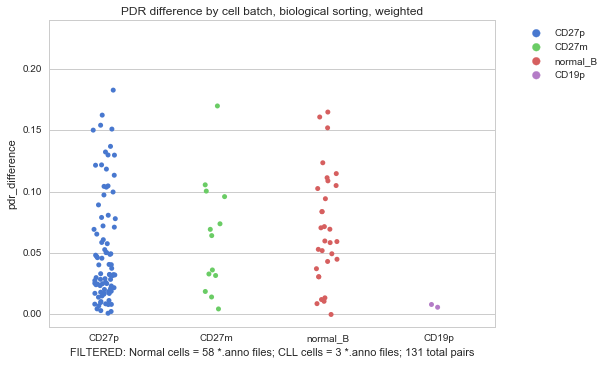

In [479]:
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], hue=total_pairs.bio, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.24)

(-0.01, 0.24)

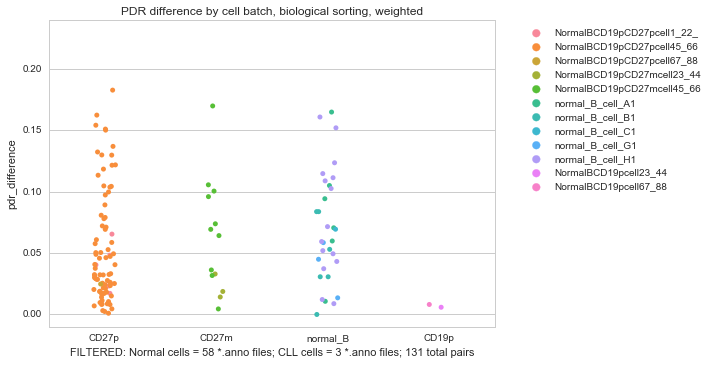

In [480]:
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], hue=total_pairs.protocol, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.24)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-0.01, 0.25)

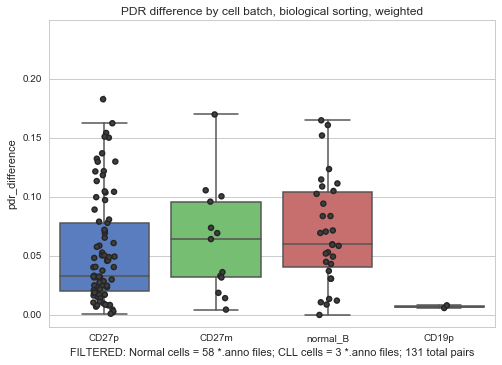

In [481]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(-0.01, 0.25)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-0.01, 0.25)

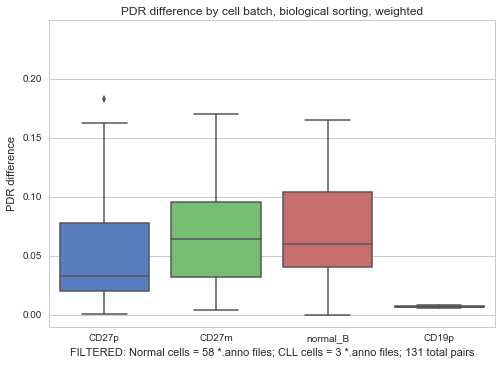

In [482]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("PDR difference")
plt.ylim(-0.01, 0.25)




/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-0.01, 0.25)

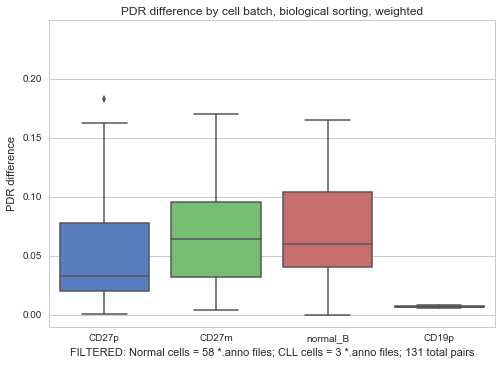

In [483]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("PDR difference")
plt.ylim(-0.01, 0.25)




In [484]:
CLL_stat = total_pairs[total_pairs["bio"]=="CLL"]
print(len(CLL_stat))
CD27p_stat = total_pairs[total_pairs["bio"]=="CD27p"]
print(len(CD27p_stat))
CD27m_stat = total_pairs[total_pairs["bio"]=="CD27m"]
print(len(CD27m_stat))
normalB_stat = total_pairs[total_pairs["bio"]=="normal_B"]
print(len(normalB_stat))
CD19p_stat = total_pairs[total_pairs["bio"]=="CD19p"]
print(len(CD19p_stat))
      

0
85
13
31
2


In [485]:
   
print(str("mean CLL ") + str(CLL_stat['pdr_difference'].mean()))  # mean
print(str("mean CD27p ") + str(CD27p_stat['pdr_difference'].mean()))
print(str("mean CD27m ") + str(CD27m_stat['pdr_difference'].mean()))
print(str("mean normalB ") + str(normalB_stat['pdr_difference'].mean()))
print(str("mean CD19p ") + str(CD19p_stat['pdr_difference'].mean()))

print(str("STD CLL ") + str(CLL_stat['pdr_difference'].std()))  # standard deviation
print(str("STD CD27p ") + str(CD27p_stat['pdr_difference'].std()))
print(str("STD CD27m ") + str(CD27m_stat['pdr_difference'].std()))
print(str("STD normalB ") + str(normalB_stat['pdr_difference'].std()))
print(str("STD CD19p ") + str(CD19p_stat['pdr_difference'].std()))

mean CLL nan
mean CD27p 0.05331946950613486
mean CD27m 0.06292014017552601
mean normalB 0.07038435159440581
mean CD19p 0.007019117446974449
STD CLL nan
STD CD27p 0.04504054507142614
STD CD27m 0.04676164383754472
STD normalB 0.045059460908118965
STD CD19p 0.0015978043345941813


In [486]:
norm_pdr_diff_frame = [CD27p_stat, CD27m_stat, normalB_stat, CD19p_stat]
pdr_diff_norm  = pd.concat(norm_pdr_diff_frame)
pdr_diff_norm.shape

(131, 15)

In [487]:
CLL_stat.shape

(0, 15)

In [488]:

t, p = ttest_ind(CLL_stat.pdr_difference, pdr_diff_norm.pdr_difference)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CLL_stat.pdr_difference, pdr_diff_norm.pdr_difference)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is nan
p-value is nan
Mann-Whitney U statistic is 0.0
p-value is 0.0


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


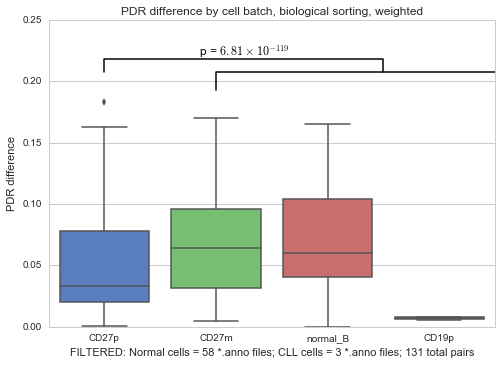

In [489]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
x1, x2 = 0, 2.5  
y, h, col = total_pairs["pdr_difference"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
x11, x22 = 1, 4  
y1, h1, col = total_pairs["pdr_difference"].max() + .01, .015, 'k'
plt.plot([x11, x11, x22, x22], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $6.81 \times 10^{-119}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR difference")
plt.savefig('PDR_by_bio_type_weighted1.eps', format='eps', dpi=100000000)


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


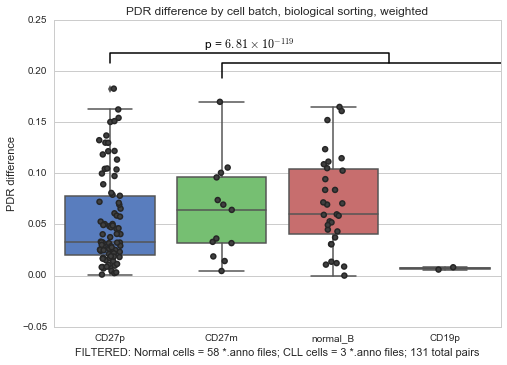

In [490]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, weighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
x1, x2 = 0, 2.5  
y, h, col = total_pairs["pdr_difference"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
x11, x22 = 1, 4  
y1, h1, col = total_pairs["pdr_difference"].max() + .01, .015, 'k'
plt.plot([x11, x11, x22, x22], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $6.81 \times 10^{-119}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR difference")
plt.savefig('PDR_by_bio_type_weighted2.eps', format='eps', dpi=100000000)

In [491]:
cllstats = merged[merged['bio']=='CLL']
cd27pstats = merged[merged['bio']=='CD19CD27p']
cd27mstats = merged[merged['bio']=='CD19CD27m']
normalbstats = merged[merged['bio']=='normal_B']
cd19stats = merged[merged['bio']=='CD19p']


cllstats = cllstats.reset_index(drop=True)
cd27pstats = cd27pstats.reset_index(drop=True)  
cd27mstats = cd27mstats.reset_index(drop=True)  
normalbstats = normalbstats.reset_index(drop=True) 
cd19stats = cd19stats.reset_index(drop=True) 

print("Mean")
print(cllstats["PDR_total"].mean())
print(cd27pstats["PDR_total"].mean())
print(cd27mstats["PDR_total"].mean())
print(normalbstats["PDR_total"].mean())
print(cd19stats["PDR_total"].mean())

print("StD")
print(cllstats["PDR_total"].std())
print(cd27pstats["PDR_total"].std())
print(cd27mstats["PDR_total"].std())
print(normalbstats["PDR_total"].std())
print(cd19stats["PDR_total"].std())

Mean
0.367487025851839
0.23644521090749865
0.20051035765113107
0.36085530768930785
0.20986964321032575
StD
0.05365938106810654
0.04949659040573162
0.039154308239242555
0.0580191065662757
0.009423326497415832


In [492]:
print("Mean")
print(cllstats["PDR_total"].mean())
print(cd27pstats["PDR_total"].mean())
print(cd27mstats["PDR_total"].mean())
print(normalbstats["PDR_total"].mean())
print(cd19stats["PDR_total"].mean())

print("StD")
print(cllstats["PDR_total"].std())
print(cd27pstats["PDR_total"].std())
print(cd27mstats["PDR_total"].std())
print(normalbstats["PDR_total"].std())
print(cd19stats["PDR_total"].std())

Mean
0.367487025851839
0.23644521090749865
0.20051035765113107
0.36085530768930785
0.20986964321032575
StD
0.05365938106810654
0.04949659040573162
0.039154308239242555
0.0580191065662757
0.009423326497415832


In [493]:
tritopool = merged[merged["protocol"] == 'trito_pool_1']
tritopool = tritopool.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopoolA = tritopool.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool.filename,2))
out = pd.DataFrame([tritopoolA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool.PDR_unweighted, tritopool.PDR_unweighted)), tritopool.filename, tritopool.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs = pd.merge(out, pdr_differences, how='inner')
print(pairs.shape)
pairs = pairs.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

(0, 2)


In [494]:
tritopool2 = merged[merged["protocol"] == 'trito_pool_2']
tritopool2 = tritopool2.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
tritopool2A = tritopool2.set_index("filename")
from itertools import combinations
cc = list(combinations(tritopool2.filename,2))
out = pd.DataFrame([tritopool2A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(tritopool2.PDR_unweighted, tritopool2.PDR_unweighted)), tritopool2.filename, tritopool2.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs1a = pd.merge(out, pdr_differences, how='inner')
print(pairs1a.shape)
pairs1a = pairs1a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

(0, 2)


In [495]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR_unweighted, cw154.PDR_unweighted)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2 = pd.merge(out, pdr_differences, how='inner')
pairs2 = pairs2.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [496]:
cw154 = merged[merged["protocol"] == 'cw154_Tris_protease_GR']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR_unweighted, cw154.PDR_unweighted)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2a = pd.merge(out, pdr_differences, how='inner')
pairs2a = pairs2a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs2a.shape)

(0, 2)


In [497]:
cw154 = merged[merged["protocol"] == 'cw154_CutSmart_proteinase_K']
cw154 = cw154.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
cw154 = cw154.reset_index(drop=True)
cw154A = cw154.set_index("filename")
from itertools import combinations
cc = list(combinations(cw154.filename,2))
out = pd.DataFrame([cw154A.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(cw154.PDR_unweighted, cw154.PDR_unweighted)), cw154.filename, cw154.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs2b = pd.merge(out, pdr_differences, how='inner')
pairs2b = pairs2b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [498]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell1_22_']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations  
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_unweighted, pcell.PDR_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3 = pd.merge(out, pdr_differences, how='inner')
pairs3 = pairs3.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [499]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell23_44']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_unweighted, pcell.PDR_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3a = pd.merge(out, pdr_differences, how='inner')
pairs3a = pairs3a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [500]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell45_66']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_unweighted, pcell.PDR_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3b = pd.merge(out, pdr_differences, how='inner')
pairs3b = pairs3b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [501]:
pcell = merged[merged["protocol"] == 'NormalBCD19pCD27pcell67_88']
pcell = pcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
pcell = pcell.reset_index(drop=True)
pcellA = pcell.set_index("filename")
from itertools import combinations
cc = list(combinations(pcell.filename,2))
out = pd.DataFrame([pcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(pcell.PDR_unweighted, pcell.PDR_unweighted)), pcell.filename, pcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs3c = pd.merge(out, pdr_differences, how='inner')
pairs3c = pairs3c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [502]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell1_22_']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_unweighted, mcell.PDR_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4 = pd.merge(out, pdr_differences, how='inner')
pairs4 = pairs4.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [503]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell23_44']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_unweighted, mcell.PDR_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4a = pd.merge(out, pdr_differences, how='inner')
pairs4a = pairs4a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [504]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell45_66']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_unweighted, mcell.PDR_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4b = pd.merge(out, pdr_differences, how='inner')
pairs4b = pairs4b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})


In [505]:
mcell = merged[merged["protocol"] == 'NormalBCD19pCD27mcell67_88']
mcell = mcell.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
mcell = mcell.reset_index(drop=True)
mcellA = mcell.set_index("filename")
from itertools import combinations
cc = list(combinations(mcell.filename,2))
out = pd.DataFrame([mcellA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(mcell.PDR_unweighted, mcell.PDR_unweighted)), mcell.filename, mcell.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs4c = pd.merge(out, pdr_differences, how='inner')
pairs4c = pairs4c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs4c.shape)

(0, 2)


In [506]:
normb = merged[merged["protocol"] == 'normal_B_cell_A1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5 = pd.merge(out, pdr_differences, how='inner')
pairs5 = pairs5.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5.shape)

(6, 12)


In [507]:
normb = merged[merged["protocol"] == 'normal_B_cell_B1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5a = pd.merge(out, pdr_differences, how='inner')
pairs5a = pairs5a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5a.shape)

(6, 12)


In [508]:
normb = merged[merged["protocol"] == 'normal_B_cell_C1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5b = pd.merge(out, pdr_differences, how='inner')
pairs5b = pairs5b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5b.shape)

(1, 12)


In [509]:
normb = merged[merged["protocol"] == 'normal_B_cell_D1_24']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5c = pd.merge(out, pdr_differences, how='inner')
pairs5c = pairs5c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})
print(pairs5c.shape)

(0, 2)


In [510]:
normb = merged[merged["protocol"] == 'normal_B_cell_G1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5d = pd.merge(out, pdr_differences, how='inner')
pairs5d = pairs5d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [511]:
normb = merged[merged["protocol"] == 'normal_B_cell_H1_22']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs5e = pd.merge(out, pdr_differences, how='inner')
pairs5e = pairs5e.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [512]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell1_22_']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6a = pd.merge(out, pdr_differences, how='inner')
pairs6a = pairs6a.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [513]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell23_44']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6b = pd.merge(out, pdr_differences, how='inner')
pairs6b = pairs6b.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [514]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell45_66']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6c = pd.merge(out, pdr_differences, how='inner')
pairs6c = pairs6c.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [515]:
normb = merged[merged["protocol"] == 'RRBS_NormalBCD19pcell67_88']
normb = normb.drop(["type", "bio", "protocol", "avgReadCpGs_median"], axis=1)
normb = normb.reset_index(drop=True)
normbA = normb.set_index("filename")
from itertools import combinations
cc = list(combinations(normb.filename,2))
out = pd.DataFrame([normbA.loc[c,:].mean() for c in cc], index=cc)
df_ex = pd.DataFrame(np.abs(np.subtract.outer(normb.PDR_unweighted, normb.PDR_unweighted)), normb.filename, normb.filename)
stacked = df_ex.stack()
pdr_differences = pd.DataFrame({'filename': stacked.index.to_series(), 'pdr_difference': stacked})[['filename', 'pdr_difference']].reset_index(drop=True)
out['filename'] = out.index
out = out.reset_index(drop=True)
pairs6d = pd.merge(out, pdr_differences, how='inner')
pairs6d = pairs6d.rename(columns = {'total_reads':'total_reads_mean', 'Unique_CpGs':'Unique_CpGs_mean', "bsRate":"bsRate_mean"})

In [516]:
pairs['type'] = str('CLL')
pairs['bio'] = str('CLL')
pairs['protocol'] = str('trito_pool_1')
print(pairs.shape)

pairs1a['type'] = str('CLL')
pairs1a['bio'] = str('CLL')
pairs1a['protocol'] = str('trito_pool_2')
print(pairs1a.shape)

pairs2['type'] = str('CLL')
pairs2['bio'] = str('CLL')
pairs2['protocol'] = str('cw154_Tris_protease')
print(pairs2.shape)

pairs2a['type'] = str('CLL')
pairs2a['bio'] = str('CLL')   
pairs2a['protocol'] = str('cw154_Tris_protease_GR')
print(pairs2a.shape)

pairs2b['type'] = str('CLL')
pairs2b['bio'] = str('CLL')
pairs2b['protocol'] = str('cw154_CutSmart_proteinase_K')
print(pairs2b.shape)


pairs3['type'] = str('normal')
pairs3['bio'] = str('CD27p')
pairs3['protocol'] = str('NormalBCD19pCD27pcell1_22_')
print(pairs3.shape)


pairs3a['type'] = str('normal')
pairs3a['bio'] = str('CD27p')
pairs3a['protocol'] = str('NormalBCD19pCD27pcell23_44')
print(pairs3a.shape)

pairs3b['type'] = str('normal')
pairs3b['bio'] = str('CD27p')
pairs3b['protocol'] = str('NormalBCD19pCD27pcell45_66')
print(pairs3b.shape)


pairs3c['type'] = str('normal')
pairs3c['bio'] = str('CD27p')
pairs3c['protocol'] = str('NormalBCD19pCD27pcell67_88')
print(pairs3c.shape)


pairs4['type'] = str('normal')
pairs4['bio'] = str('CD27m')
pairs4['protocol'] = str('NormalBCD19pCD27mcell1_22_')
print(pairs4.shape)


pairs4a['type'] = str('normal')
pairs4a['bio'] = str('CD27m')
pairs4a['protocol'] = str('NormalBCD19pCD27mcell23_44')
print(pairs4a.shape)


pairs4b['type'] = str('normal')
pairs4b['bio'] = str('CD27m')
pairs4b['protocol'] = str('NormalBCD19pCD27mcell45_66')
print(pairs4b.shape)

pairs4c['type'] = str('normal')
pairs4c['bio'] = str('CD27m')
pairs4c['protocol'] = str('NormalBCD19pCD27mcell67_88')
print(pairs4c.shape)


pairs5['type'] = str('normal')
pairs5['bio'] = str('normal_B')
pairs5['protocol'] = str('normal_B_cell_A1')
print(pairs5.shape)

pairs5a['type'] = str('normal')
pairs5a['bio'] = str('normal_B')
pairs5a['protocol'] = str('normal_B_cell_B1')
print(pairs5a.shape)


pairs5b['type'] = str('normal')
pairs5b['bio'] = str('normal_B')
pairs5b['protocol'] = str('normal_B_cell_C1')
print(pairs5b.shape)
print("pairs5b")

pairs5c['type'] = str('normal')
pairs5c['bio'] = str('normal_B')
pairs5c['protocol'] = str('normal_B_cell_D1')
print(pairs5c.shape)

pairs5d['type'] = str('normal')
pairs5d['bio'] = str('normal_B')
pairs5d['protocol'] = str('normal_B_cell_G1')
print(pairs5d.shape)

pairs5e['type'] = str('normal')
pairs5e['bio'] = str('normal_B')
pairs5e['protocol'] = str('normal_B_cell_H1')
print(pairs5e.shape)






pairs6a['type'] = str('normal')
pairs6a['bio'] = str('CD19p')
pairs6a['protocol'] = str('NormalBCD19pcell1_22_')
print(pairs6a.shape)

pairs6b['type'] = str('normal')
pairs6b['bio'] = str('CD19p')
pairs6b['protocol'] = str('NormalBCD19pcell23_44')
print(pairs6b.shape)

pairs6c['type'] = str('normal')
pairs6c['bio'] = str('CD19p')
pairs6c['protocol'] = str('NormalBCD19pcell45_66')
print(pairs6c.shape)

pairs6d['type'] = str('normal')
pairs6d['bio'] = str('CD19p')
pairs6d['protocol'] = str('NormalBCD19pcell67_88')
print(pairs6d.shape)

(0, 5)
(0, 5)
(0, 5)
(0, 5)
(0, 5)
(6, 15)
(0, 5)
(78, 15)
(1, 15)
(6, 15)
(3, 15)
(10, 15)
(0, 5)
(6, 15)
(6, 15)
(1, 15)
pairs5b
(0, 5)
(3, 15)
(15, 15)
(0, 5)
(1, 15)
(0, 5)
(1, 15)


In [517]:
frames22 = [pairs, pairs1a, pairs2, pairs2a, pairs2b, pairs3, pairs3a, pairs3b, 
            pairs3c, pairs4a, pairs4b, pairs4c, pairs5, pairs5a, pairs5b, pairs5c, pairs5d, pairs5e, pairs6a, pairs6b, pairs6c, pairs6d]
total_pairs = pd.concat(frames22)


In [518]:
total_pairs.shape

(131, 15)

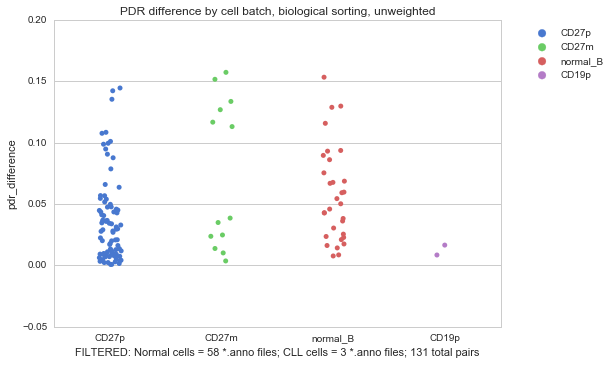

In [519]:
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], hue=total_pairs.bio, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

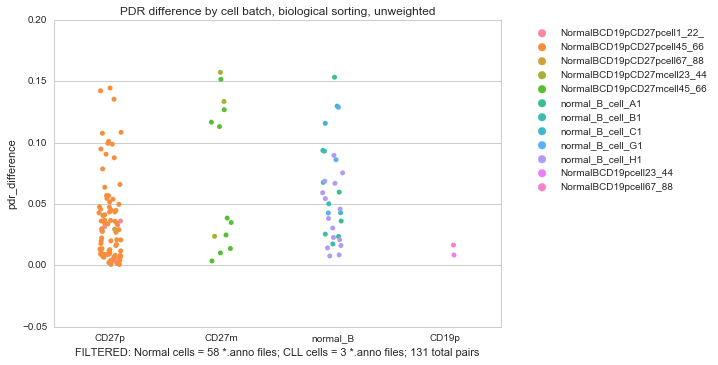

In [520]:
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], hue=total_pairs.protocol, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


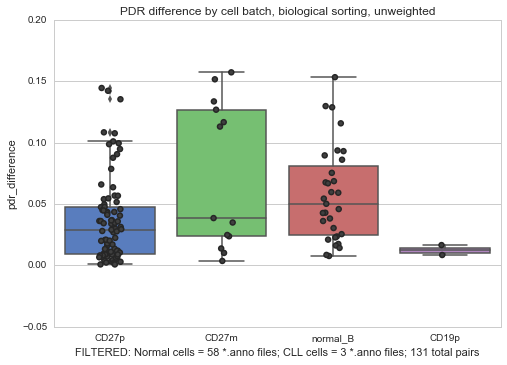

In [521]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


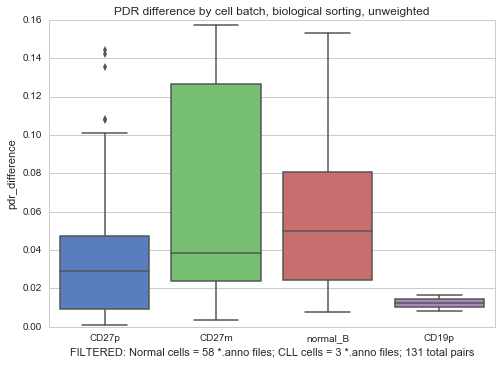

In [522]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
sns.plt.title("PDR difference by cell batch, biological sorting, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [523]:
CLL_stat = total_pairs[total_pairs["bio"]=="CLL"]
print(len(CLL_stat))
CD27p_stat = total_pairs[total_pairs["bio"]=="CD27p"]
print(len(CD27p_stat))
CD27m_stat = total_pairs[total_pairs["bio"]=="CD27m"]
print(len(CD27m_stat))
normalB_stat = total_pairs[total_pairs["bio"]=="normal_B"]
print(len(normalB_stat))
CD19p_stat = total_pairs[total_pairs["bio"]=="CD19p"]
print(len(CD19p_stat))

0
85
13
31
2


In [524]:
   
print(str("mean CLL ") + str(CLL_stat['pdr_difference'].mean()))  # mean
print(str("mean CD27p ") + str(CD27p_stat['pdr_difference'].mean()))
print(str("mean CD27m ") + str(CD27m_stat['pdr_difference'].mean()))
print(str("mean normalB ") + str(normalB_stat['pdr_difference'].mean()))
print(str("mean CD19p ") + str(CD19p_stat['pdr_difference'].mean()))

print(str("STD CLL ") + str(CLL_stat['pdr_difference'].std()))  # standard deviation
print(str("STD CD27p ") + str(CD27p_stat['pdr_difference'].std()))
print(str("STD CD27m ") + str(CD27m_stat['pdr_difference'].std()))
print(str("STD normalB ") + str(normalB_stat['pdr_difference'].std()))
print(str("STD CD19p ") + str(CD19p_stat['pdr_difference'].std()))

mean CLL nan
mean CD27p 0.03623941098185412
mean CD27m 0.07294815145814532
mean normalB 0.05756749945213315
mean CD19p 0.01248543012658497
STD CLL nan
STD CD27p 0.034431500013561295
STD CD27m 0.05987443440722397
STD normalB 0.03868631434513572
STD CD19p 0.005706157301006779


In [525]:
norm_pdr_diff_frame = [CD27p_stat, CD27m_stat, normalB_stat, CD19p_stat]
pdr_diff_norm  = pd.concat(norm_pdr_diff_frame)
pdr_diff_norm.shape


(131, 15)

In [526]:

t, p = ttest_ind(CLL_stat.pdr_difference, pdr_diff_norm.pdr_difference)
print(str("t-statistic is ") + str(t))
print(str("p-value is ") + str(p))

#
# The classic Student's t-test is a parametric test that only works when the data are normally distributed.
# A good non-parametric alternative to the t-test is the Mann-Whitney U-test (called ranksum in matlab, 
#     or Wilcoxon test, or Man-Whitney-Wilcoxon)
#
import scipy.stats
z, p = scipy.stats.mannwhitneyu(CLL_stat.pdr_difference, pdr_diff_norm.pdr_difference)
p_value = p * 2
print(str("Mann-Whitney U statistic is ") + str(z))
print(str("p-value is ") + str(p_value))

t-statistic is nan
p-value is nan
Mann-Whitney U statistic is 0.0
p-value is 0.0


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


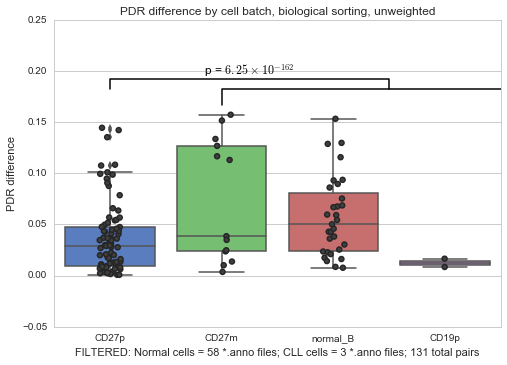

In [527]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
ax = sns.stripplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("PDR difference by cell batch, biological sorting, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
x1, x2 = 0, 2.5  
y, h, col = total_pairs["pdr_difference"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
x11, x22 = 1, 4  
y1, h1, col = total_pairs["pdr_difference"].max() + .01, .015, 'k'
plt.plot([x11, x11, x22, x22], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $6.25 \times 10^{-162}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR difference")
plt.savefig('PDR_by_bio_type_unweighted1.eps', format='eps', dpi=100000000)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


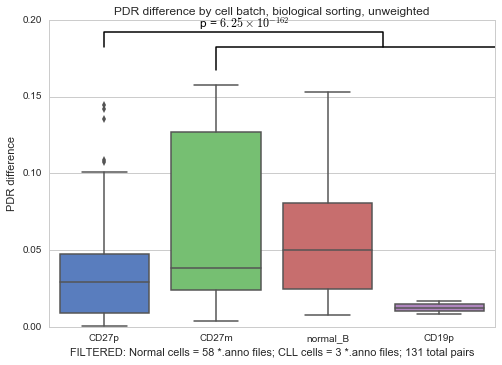

In [528]:
ax = sns.boxplot(x=total_pairs["bio"], y=total_pairs["pdr_difference"], linewidth=1.5)  
sns.plt.title("PDR difference by cell batch, biological sorting, unweighted")
plt.xlabel("FILTERED: Normal cells = 58 *.anno files; CLL cells = 3 *.anno files; 131 total pairs")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
x1, x2 = 0, 2.5  
y, h, col = total_pairs["pdr_difference"].max() + .025, .01, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
x11, x22 = 1, 4  
y1, h1, col = total_pairs["pdr_difference"].max() + .01, .015, 'k'
plt.plot([x11, x11, x22, x22], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r'p = $6.25 \times 10^{-162}$', ha='center', va='bottom', color=col)
plt.ylabel("PDR difference")
plt.savefig('PDR_by_bio_type_unweighted2.eps', format='eps', dpi=100000000)

In [529]:
merged.columns

Index(['filename', 'avgReadCpGs_mean', 'avgReadCpGs_median', 'protocol',
       'type', 'bio', 'total_reads', 'totCpG', 'bsRate', 'methylation',
       'PDR_total', 'avgReadCpGs_lessthan1filter',
       'avgReadCpGs_lesseql3.8filter', 'PDR_unweighted',
       'methylation_unweighted'],
      dtype='object')

In [530]:
cllstats = merged[merged['bio']=='CLL']
cd27pstats = merged[merged['bio']=='CD19CD27p']
cd27mstats = merged[merged['bio']=='CD19CD27m']
normalbstats = merged[merged['bio']=='normal_B']
cd19stats = merged[merged['bio']=='CD19p']


cllstats = cllstats.reset_index(drop=True)
cd27pstats = cd27pstats.reset_index(drop=True)  
cd27mstats = cd27mstats.reset_index(drop=True)  
normalbstats = normalbstats.reset_index(drop=True) 
cd19stats = cd19stats.reset_index(drop=True) 

print("Mean")
print(cllstats["PDR_unweighted"].mean())
print(cd27pstats["PDR_unweighted"].mean())
print(cd27mstats["PDR_unweighted"].mean())
print(normalbstats["PDR_unweighted"].mean())
print(cd19stats["PDR_unweighted"].mean())

print("StD")
print(cllstats["PDR_unweighted"].std())
print(cd27pstats["PDR_unweighted"].std())
print(cd27mstats["PDR_unweighted"].std())
print(normalbstats["PDR_unweighted"].std())
print(cd19stats["PDR_unweighted"].std())

Mean
0.3937519284111091
0.26167683639116174
0.22405022591811083
0.34503901463023945
0.224671477599155
StD
0.015755742441401897
0.03943056063218194
0.05294277902142985
0.06240679407473581
0.016780458255363274


In [531]:
total_pairs.columns

Index(['PDR_total', 'PDR_unweighted', 'avgReadCpGs_lesseql3.8filter',
       'avgReadCpGs_lessthan1filter', 'avgReadCpGs_mean', 'bio', 'bsRate_mean',
       'filename', 'methylation', 'methylation_unweighted', 'pdr_difference',
       'protocol', 'totCpG', 'total_reads_mean', 'type'],
      dtype='object')

In [532]:
y = total_pairs.pdr_difference # dependent variable
X = total_pairs.drop(['PDR_unweighted', 'pdr_difference', 'total_reads_mean', 'filename', 'PDR_total', 'avgReadCpGs_lesseql3.8filter', 'avgReadCpGs_lessthan1filter', 'bio', 'methylation', 'methylation_unweighted', 'protocol'], axis=1)

categorical_variables = ['type']
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)
    
X = X.drop(['type_normal'], axis=1)

y = y.dropna()
X = X.dropna()

In [533]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print("Regression results, all batches 'Normal B' vs 'CLL' , predict \delta PDR")
est.summary()

Regression results, all batches 'Normal B' vs 'CLL' , predict \delta PDR


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pdr_difference   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.088
Date:                Wed, 27 Jul 2016   Prob (F-statistic):            0.00828
Time:                        14:45:00   Log-Likelihood:                 241.33
No. Observations:                 131   AIC:                            -474.7
Df Residuals:                     127   BIC:                            -463.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.6020      0.258      2.336      0.021         0.092     1.112
avgReadCpGs_mean    -0.0373      0.012     -3.104      0.002        -0.061    -0.014
bsRate_mean         -0.3721      0.254     -1.462      0.146        -0.876     0.131
totCpG           -3.324e-07   6.75e-07     -0.492      0.623     -1.67e-06     1e-06
==============================================================================
Omnibus:                       24.716   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.610
Skew:                           1.138   Prob(JB):                     1.37e-07
Kurtosis:                       3.779   Cond. No.                     8.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


Random Forest model score is 0.882137061416


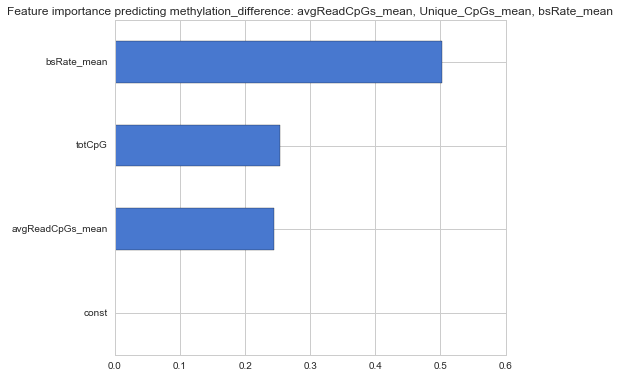

In [534]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

model = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=36)
model.fit(X, y)
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6))
plt.title("Feature importance predicting methylation_difference: avgReadCpGs_mean, Unique_CpGs_mean, bsRate_mean")
print(str("Random Forest model score is ") + str(model.score(X,y)))